# Real-time Election Results: 2019 Portuguese Parliamentary Election
###    In this we are going result of Election who's wining or not, than we will compare it to the actual Results and that after that we will save out best model 

##### Let's start with importing some important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("ElectionData.csv")
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [3]:
df.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

In [5]:
df.shape

(21643, 28)

In [6]:
df.dtypes.to_frame()

,0
TimeElapsed,int64
time,object
territoryName,object
totalMandates,int64
availableMandates,int64
numParishes,int64
numParishesApproved,int64
blankVotes,int64
blankVotesPercentage,float64
nullVotes,int64


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TimeElapsed,21643.0,133.146052,7.765119e+01,0.00,65.00,135.00,200.00,265.00
totalMandates,21643.0,11.544795,3.131457e+01,0.00,1.00,4.00,9.00,226.00
availableMandates,21643.0,11.499284,3.173878e+01,0.00,0.00,3.00,9.00,226.00
numParishes,21643.0,309.956013,6.590559e+02,54.00,75.00,147.00,242.00,3092.00
numParishesApproved,21643.0,261.090237,5.833774e+02,3.00,67.00,120.00,208.00,3092.00
blankVotes,21643.0,8875.066673,2.148487e+04,19.00,1188.00,2998.00,6889.00,129599.00
blankVotesPercentage,21643.0,2.621629,7.952894e-01,0.53,2.23,2.64,2.98,5.46
nullVotes,21643.0,6148.068752,1.473547e+04,39.00,1094.00,2232.00,4121.00,88539.00
nullVotesPercentage,21643.0,1.961471,3.752501e-01,1.34,1.72,1.87,2.23,3.35
votersPercentage,21643.0,51.983722,4.854380e+00,35.98,50.29,53.13,54.55,59.87


In [8]:
df.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

# EDA

## Now we are going to check the correlations in dataset, if any

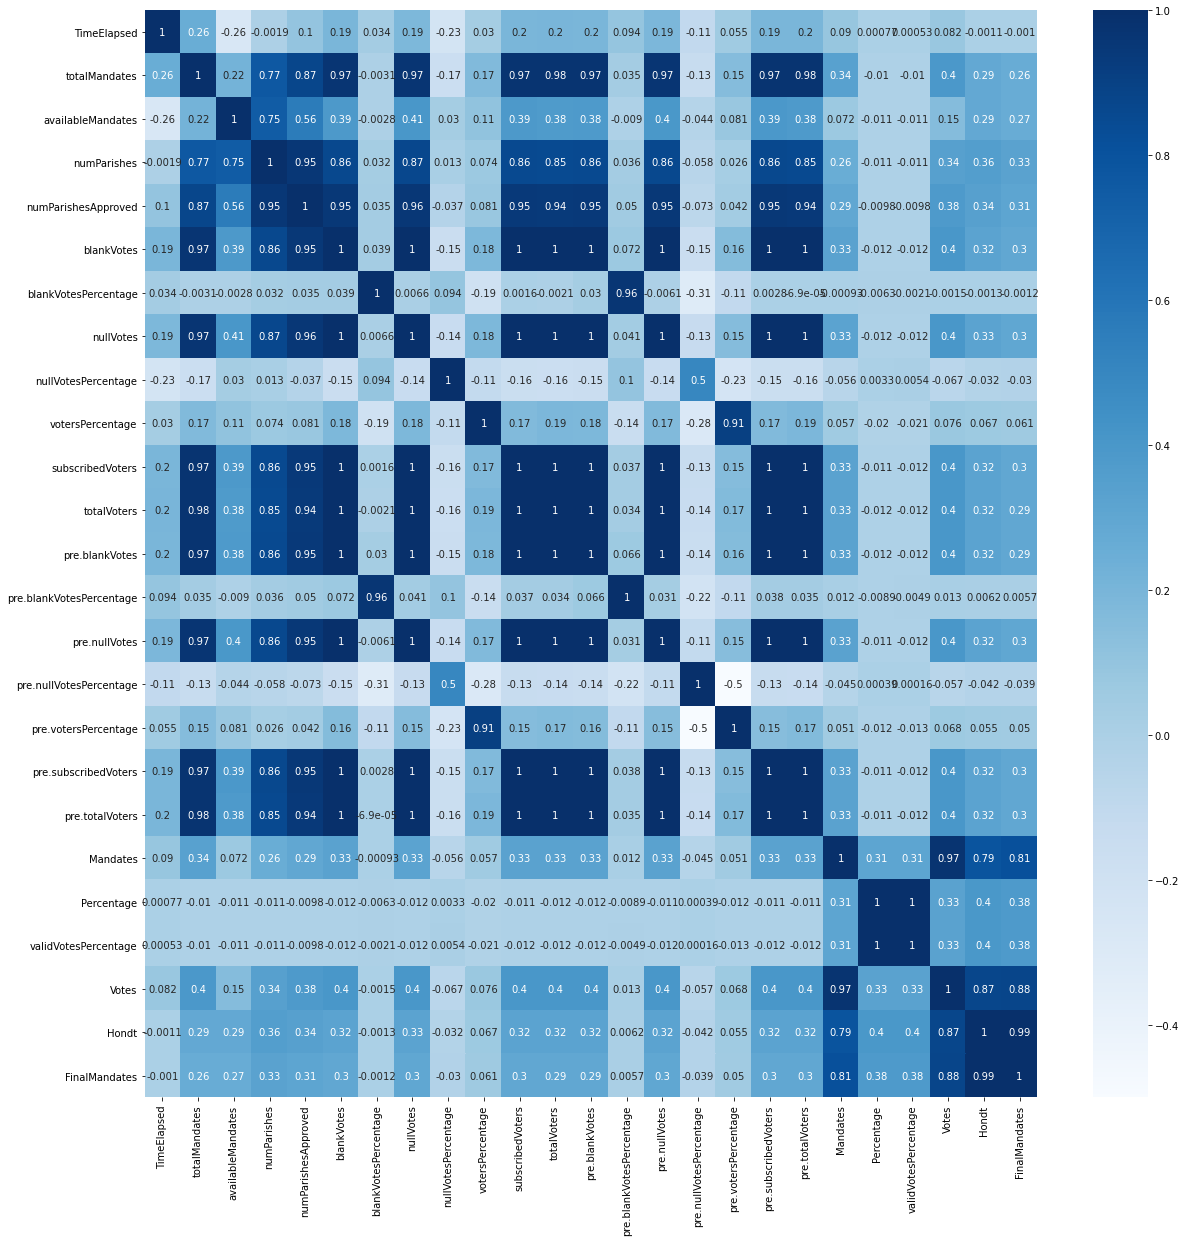

In [9]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Blues")

[Text(1, 0.5, 'totalMandates'),
 Text(1, 1.5, 'blankVotes'),
 Text(1, 2.5, 'pre.blankVotes'),
 Text(1, 3.5, 'totalVoters'),
 Text(1, 4.5, 'pre.subscribedVoters'),
 Text(1, 5.5, 'subscribedVoters'),
 Text(1, 6.5, 'pre.totalVoters'),
 Text(1, 7.5, 'nullVotes'),
 Text(1, 8.5, 'pre.nullVotes'),
 Text(1, 9.5, 'numParishes'),
 Text(1, 10.5, 'numParishesApproved'),
 Text(1, 11.5, 'blankVotesPercentage'),
 Text(1, 12.5, 'pre.blankVotesPercentage'),
 Text(1, 13.5, 'nullVotesPercentage'),
 Text(1, 14.5, 'pre.nullVotesPercentage'),
 Text(1, 15.5, 'TimeElapsed'),
 Text(1, 16.5, 'votersPercentage'),
 Text(1, 17.5, 'pre.votersPercentage'),
 Text(1, 18.5, 'Percentage'),
 Text(1, 19.5, 'validVotesPercentage'),
 Text(1, 20.5, 'availableMandates'),
 Text(1, 21.5, 'Hondt'),
 Text(1, 22.5, 'FinalMandates'),
 Text(1, 23.5, 'Mandates'),
 Text(1, 24.5, 'Votes')]

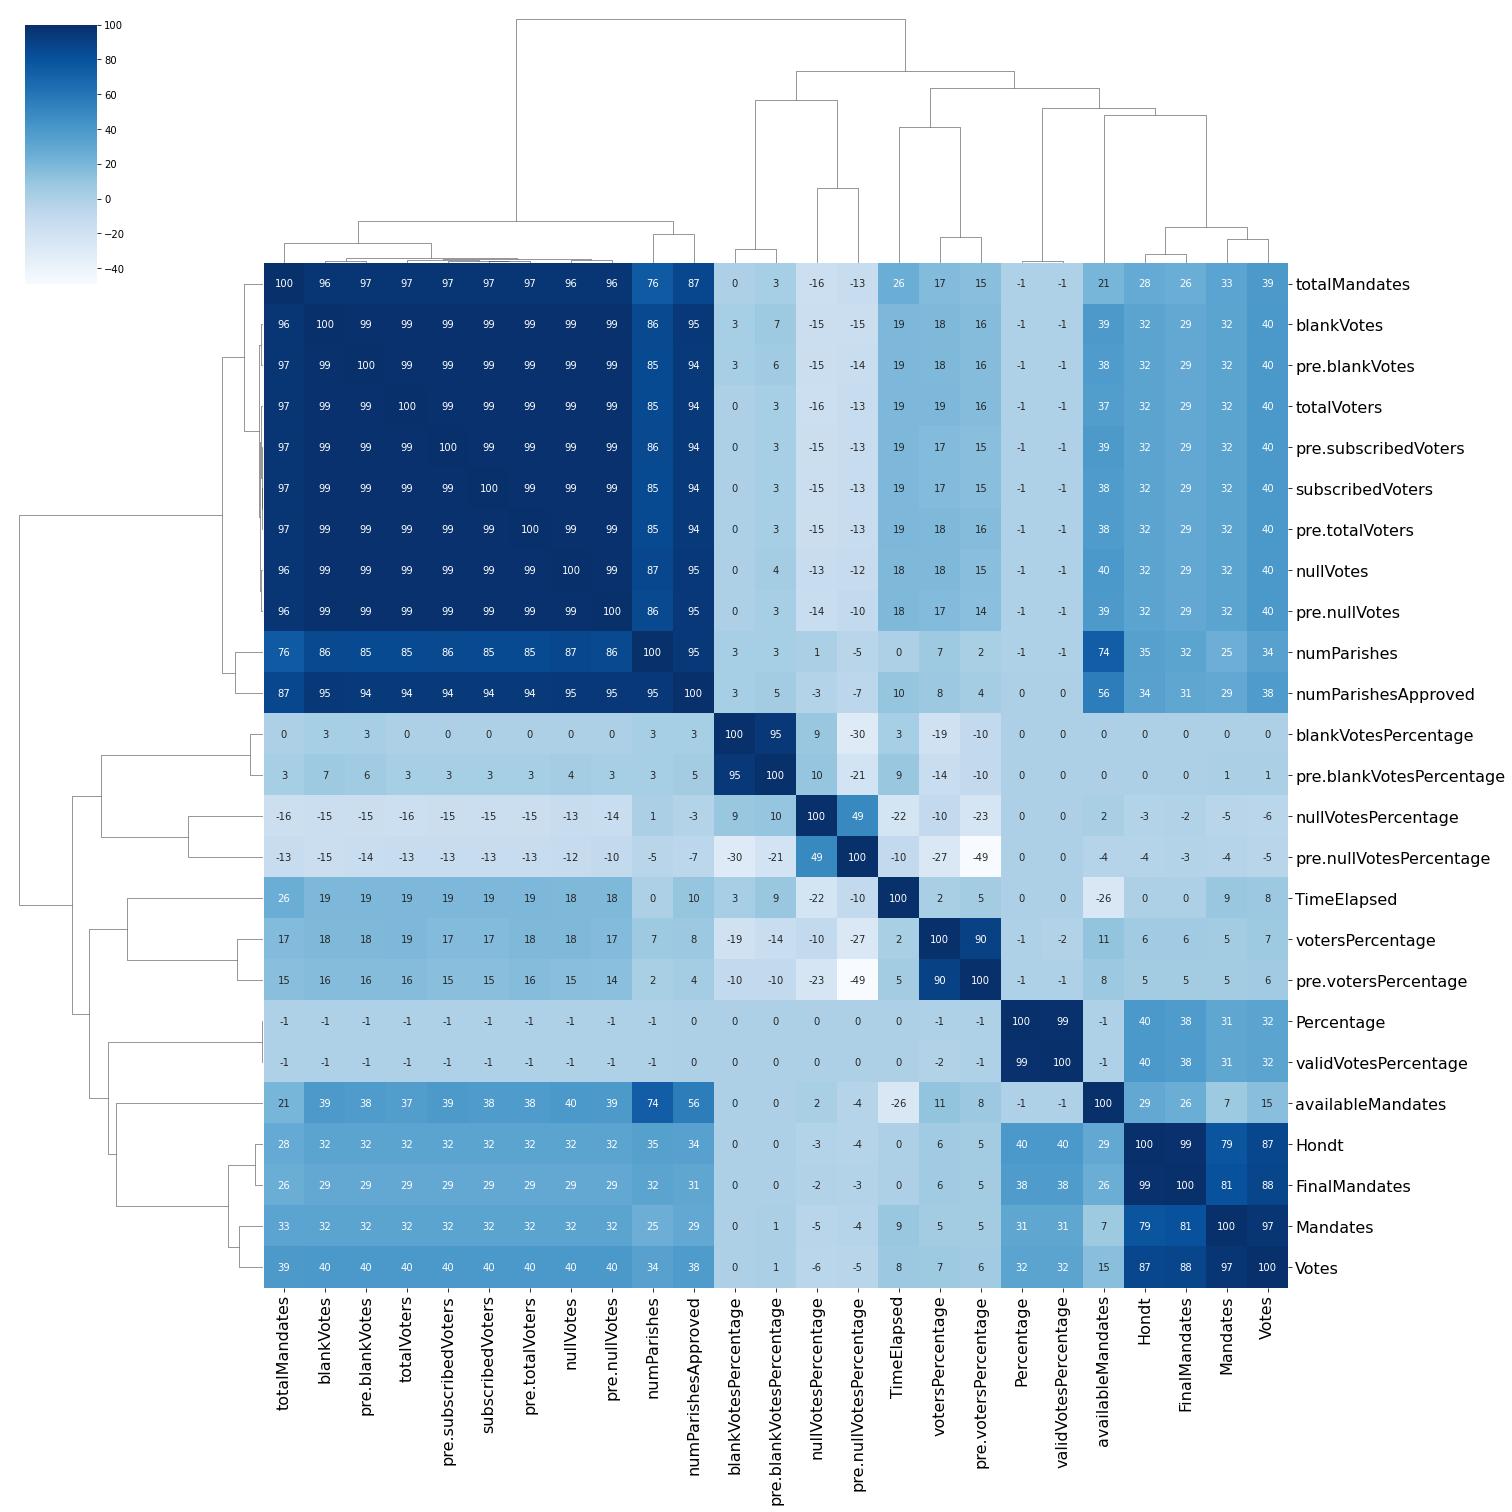

In [10]:
corr = df.corr().mul(100).astype(int)
g = sns.clustermap(data=corr, annot=True, fmt="d", cmap="Blues",figsize=(20,20))
cmap=sns.diverging_palette(h_neg=500,h_pos=100,s=100,l=0, as_cmap=True)

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize=16)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize=16)

##### Now we will drop some columns from correlation heatmap with multiple observations of high correlation cofficients(>90 or >0.90) to avoid multicollinearity

In [11]:
df.drop(["totalMandates","numParishesApproved","blankVotes","nullVotes","subscribedVoters","totalVoters",
         "pre.blankVotes","pre.nullVotes","pre.subscribedVoters","pre.totalVoters","Percentage","Mandates",
         "pre.blankVotesPercentage","pre.votersPercentage"],axis=1,inplace=True)

In [12]:
df.head()

,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PS,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PPD/PSD,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,B.E.,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,CDS-PP,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PCP-PEV,4.83,17757,11,12


In [13]:
df.shape

(21643, 14)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TimeElapsed              21643 non-null  int64  
 1   time                     21643 non-null  object 
 2   territoryName            21643 non-null  object 
 3   availableMandates        21643 non-null  int64  
 4   numParishes              21643 non-null  int64  
 5   blankVotesPercentage     21643 non-null  float64
 6   nullVotesPercentage      21643 non-null  float64
 7   votersPercentage         21643 non-null  float64
 8   pre.nullVotesPercentage  21643 non-null  float64
 9   Party                    21643 non-null  object 
 10  validVotesPercentage     21643 non-null  float64
 11  Votes                    21643 non-null  int64  
 12  Hondt                    21643 non-null  int64  
 13  FinalMandates            21643 non-null  int64  
dtypes: float64(5), int64(6

In [15]:
x = df.drop(["FinalMandates"],axis=1)
y = df["FinalMandates"]

for attr in x.columns:
    print("\n",attr)
    print(x[attr].value_counts())


 TimeElapsed
255    403
40     403
135    403
55     403
230    403
150    403
70     403
245    403
165    403
85     403
260    403
180    403
100    403
195    403
115    403
35     403
210    403
130    403
50     403
225    403
145    403
65     403
240    403
160    403
80     403
175    403
215    403
120    403
75     403
125    403
45     403
220    403
140    403
60     403
235    403
200    403
155    403
250    403
110    403
190    403
170    403
90     403
265    403
185    403
105    403
95     403
205    403
15     386
20     386
30     386
5      386
10     386
25     386
0      386
Name: TimeElapsed, dtype: int64

 time
2019-10-06 22:00:02    403
2019-10-06 23:50:02    403
2019-10-06 22:40:02    403
2019-10-06 21:50:01    403
2019-10-06 23:45:02    403
2019-10-06 23:25:02    403
2019-10-07 00:30:02    403
2019-10-06 21:55:01    403
2019-10-06 22:45:01    403
2019-10-06 23:55:01    403
2019-10-07 00:05:01    403
2019-10-06 22:05:02    403
2019-10-07 00:20:02    403
20

In [16]:
df["territoryName"].value_counts()

Porto                  1134
Território Nacional    1134
Braga                  1134
Leiria                 1134
Viseu                  1080
Madeira                1080
Setúbal                1080
Aveiro                 1080
Lisboa                 1080
Coimbra                1080
Viana do Castelo       1080
Faro                   1026
Guarda                 1026
Santarém               1026
Évora                  1026
Castelo Branco          972
Bragança                972
Beja                    918
Portalegre              918
Vila Real               864
Açores                  799
Name: territoryName, dtype: int64

In [17]:
df["Party"].value_counts()

PNR          1127
PCTP/MRPP    1127
PDR          1127
CH           1127
L            1127
PS           1127
PPD/PSD      1127
IL           1127
B.E.         1127
PCP-PEV      1127
CDS-PP       1127
A            1127
PAN          1127
PPM          1073
R.I.R.       1026
PTP          1019
MPT          1019
PURP          972
NC            972
JPP           486
MAS           425
Name: Party, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TimeElapsed              21643 non-null  int64  
 1   time                     21643 non-null  object 
 2   territoryName            21643 non-null  object 
 3   availableMandates        21643 non-null  int64  
 4   numParishes              21643 non-null  int64  
 5   blankVotesPercentage     21643 non-null  float64
 6   nullVotesPercentage      21643 non-null  float64
 7   votersPercentage         21643 non-null  float64
 8   pre.nullVotesPercentage  21643 non-null  float64
 9   Party                    21643 non-null  object 
 10  validVotesPercentage     21643 non-null  float64
 11  Votes                    21643 non-null  int64  
 12  Hondt                    21643 non-null  int64  
 13  FinalMandates            21643 non-null  int64  
dtypes: float64(5), int64(6


# EDA

In [19]:
numerical_variables = [features for features in df.columns if df[features].dtypes!="O"]
numerical_variables.remove("FinalMandates")
numerical_variables

['TimeElapsed',
 'availableMandates',
 'numParishes',
 'blankVotesPercentage',
 'nullVotesPercentage',
 'votersPercentage',
 'pre.nullVotesPercentage',
 'validVotesPercentage',
 'Votes',
 'Hondt']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C42539E550>,
      dtype=object)

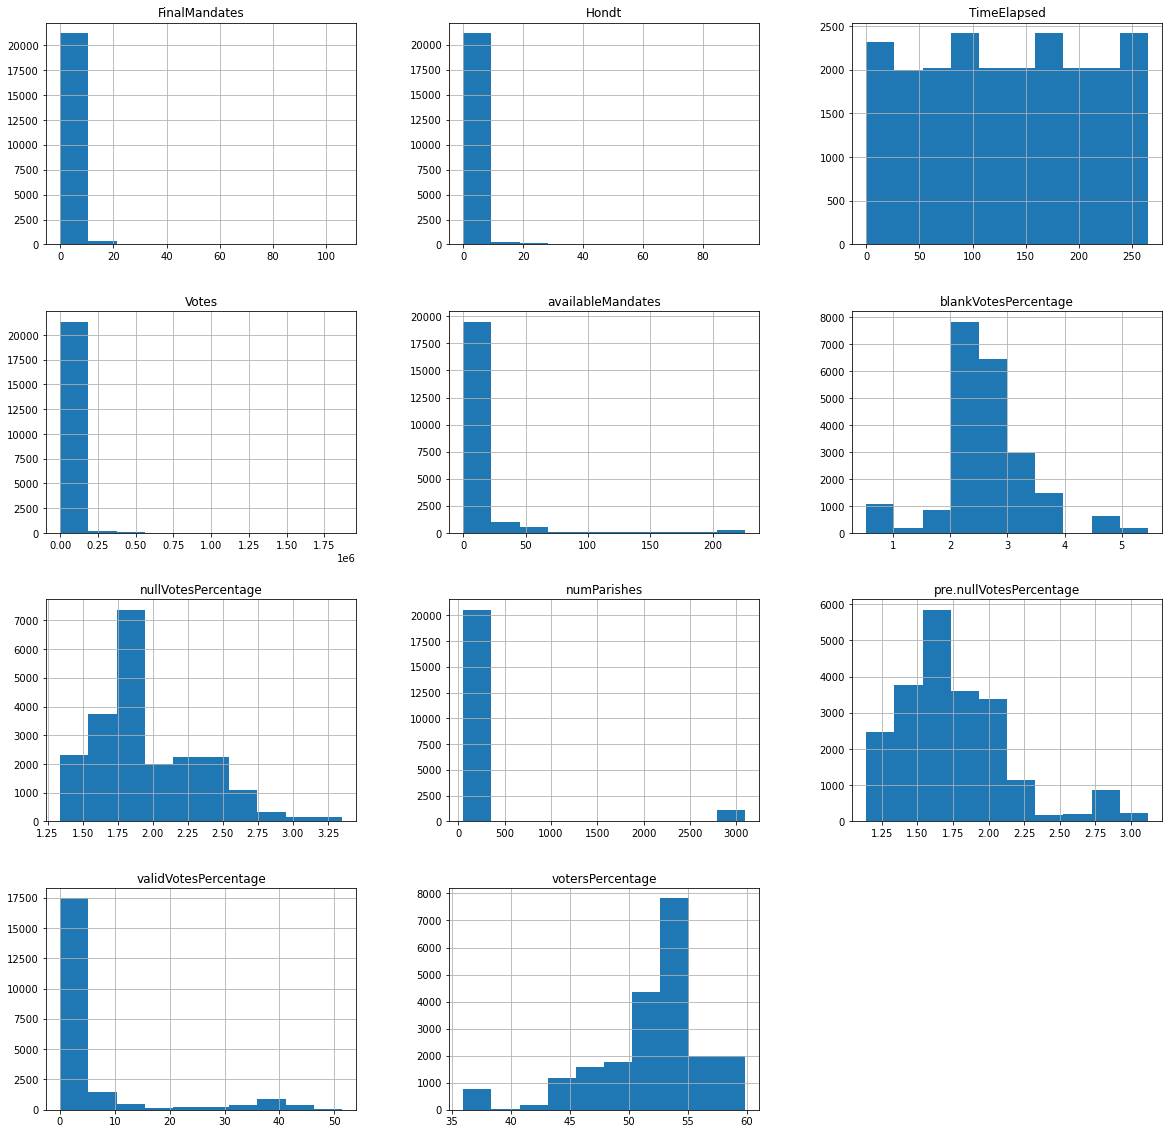

In [20]:
df.hist(figsize=(20,20))

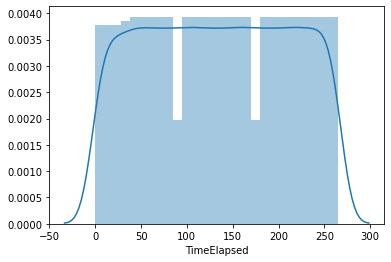

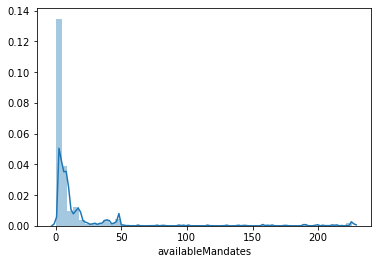

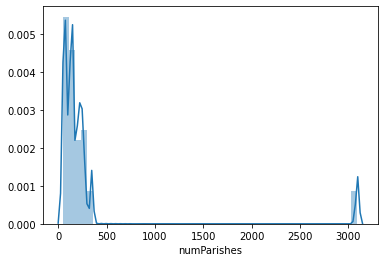

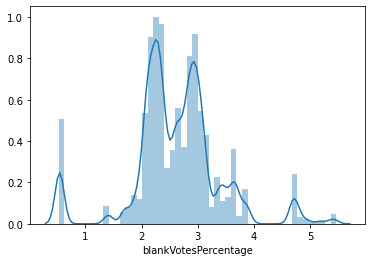

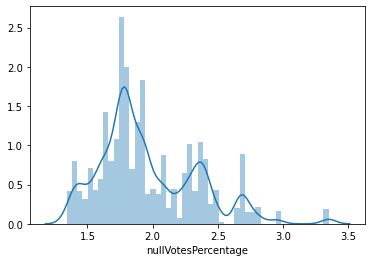

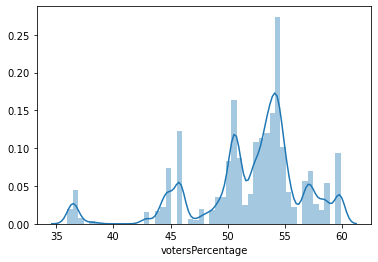

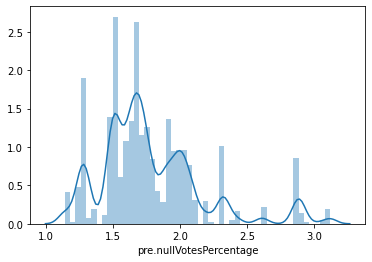

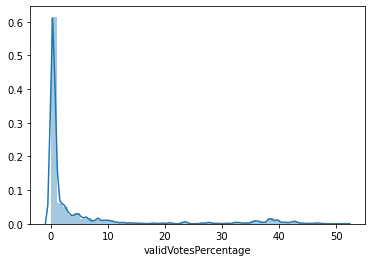

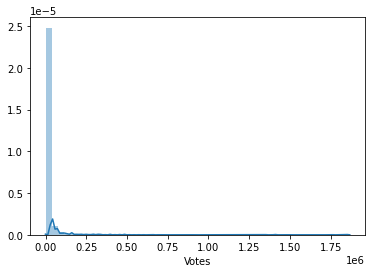

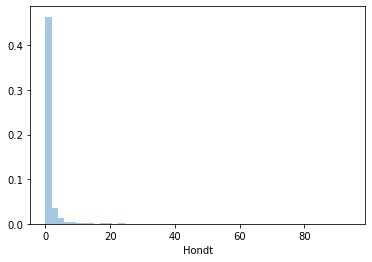

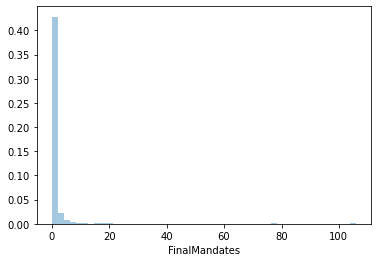

In [21]:
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

##### After seeing above graphs the blankVotesPercentage, nullVotesPercentage, pre.nullVotesPercentage
##### AvailableMandates, validVotesPrecentage, Votes, Hondt are the exponential distribution
##### votersPercentage skewed to the right it is in skewed distribution

### As we can see the variables are noramlly distributed, so normalization is required for regression

## PMF 

###### to see few unique values in the columns from probability of occurence of unique values when picked randomly


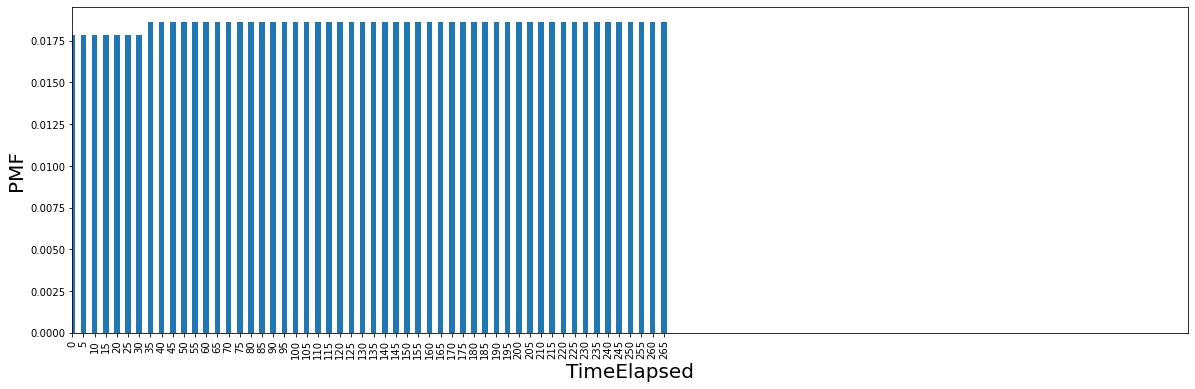

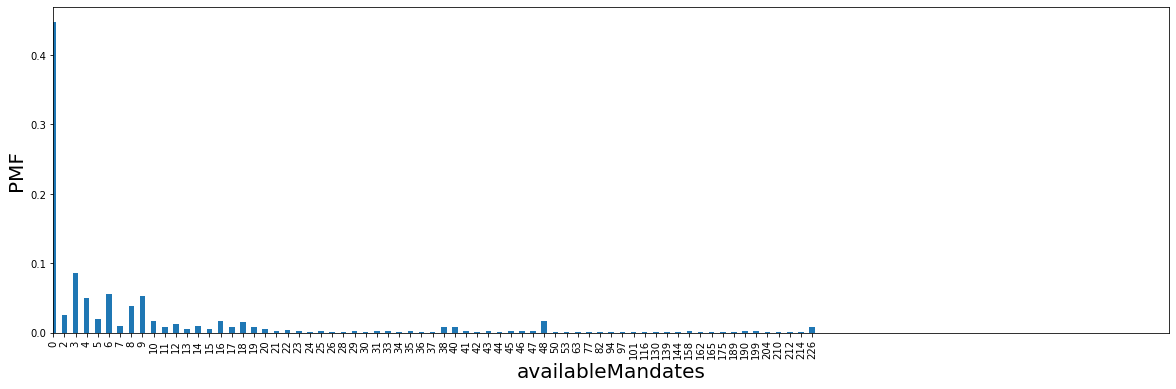

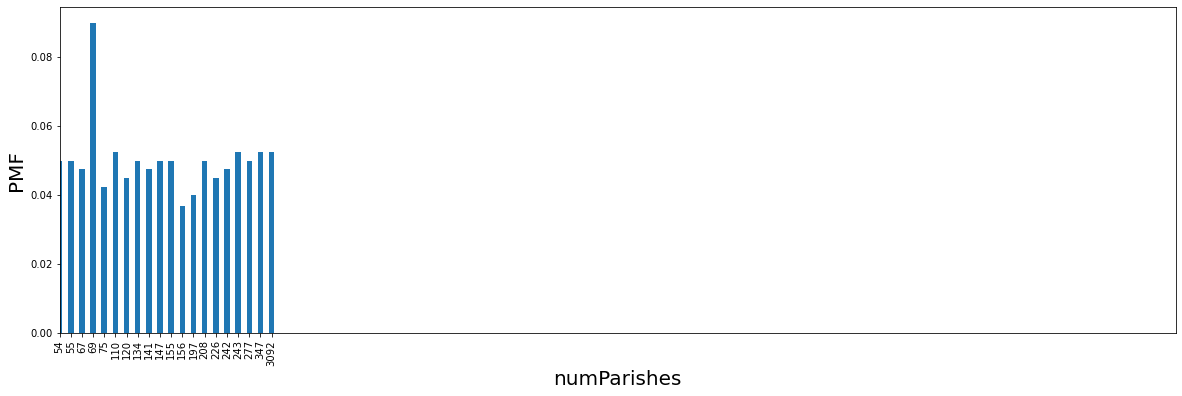

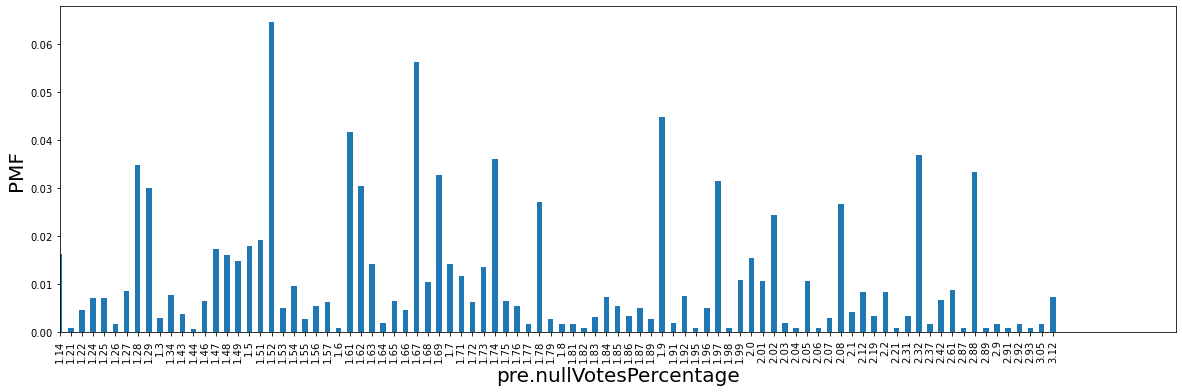

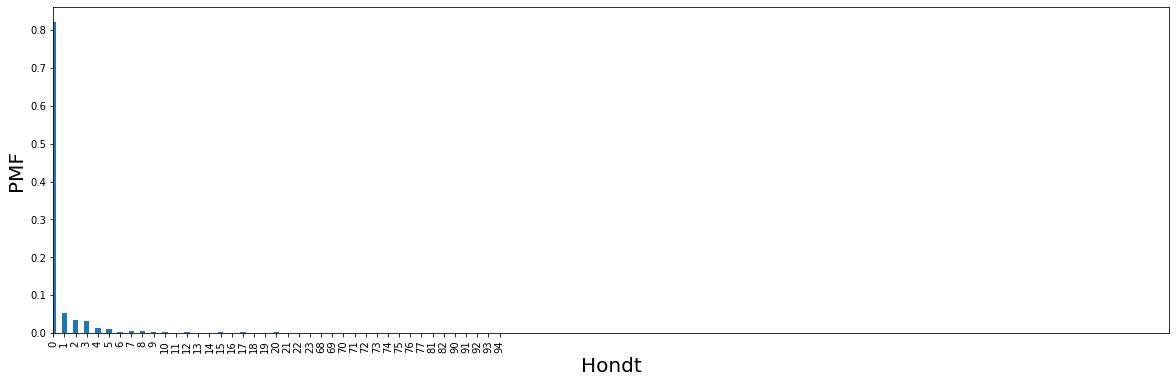

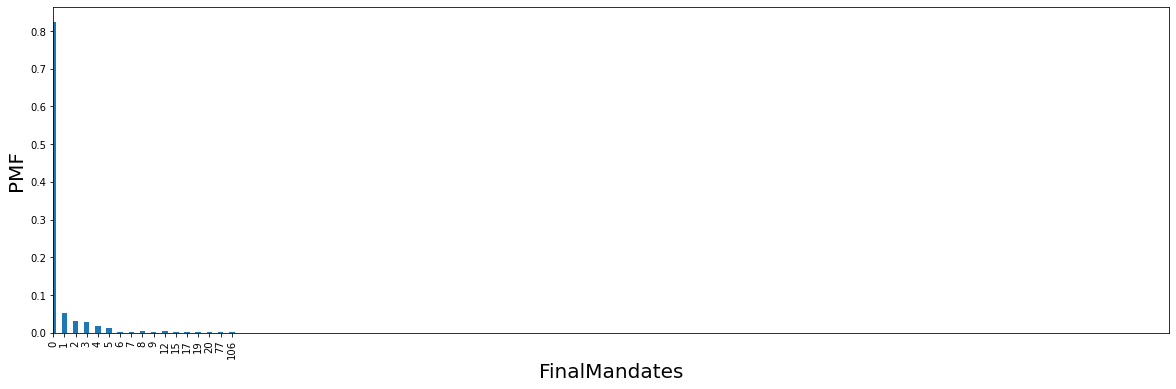

In [22]:
def pmf_func(dataset,lists):
    for i in lists:
        pmf =dataset[i].value_counts().sort_index() / len(dataset[i])
        plt.figure(figsize = (20,6))
        pmf.plot(kind="bar",fontsize=10)
        plt.xlabel(i,fontsize=20)
        plt.ylabel("PMF",fontsize=20)
        plt.xlim(0,100)
few_unique = ["TimeElapsed","availableMandates","numParishes","pre.nullVotesPercentage","Hondt","FinalMandates"]
pmf_func(df,few_unique)

##### From  above graph Hondt, FinalMndates, availableMandates following variables have 0 as the dominant value

## CDF plot

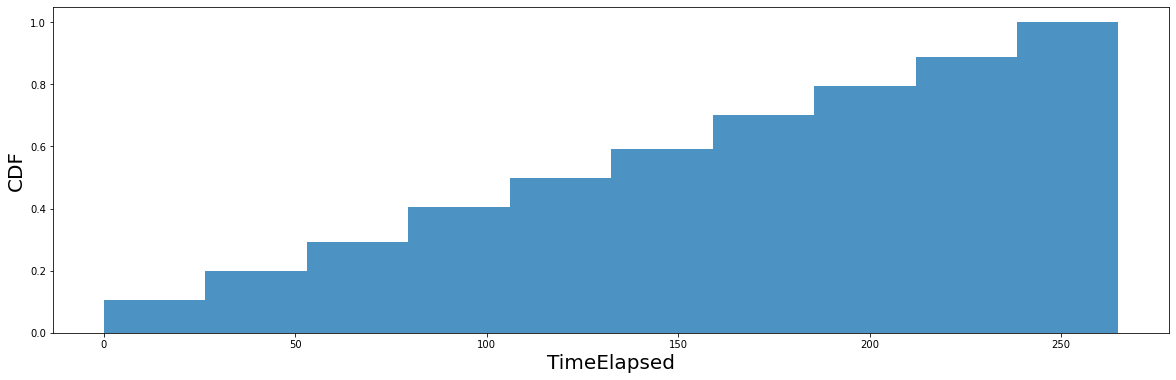

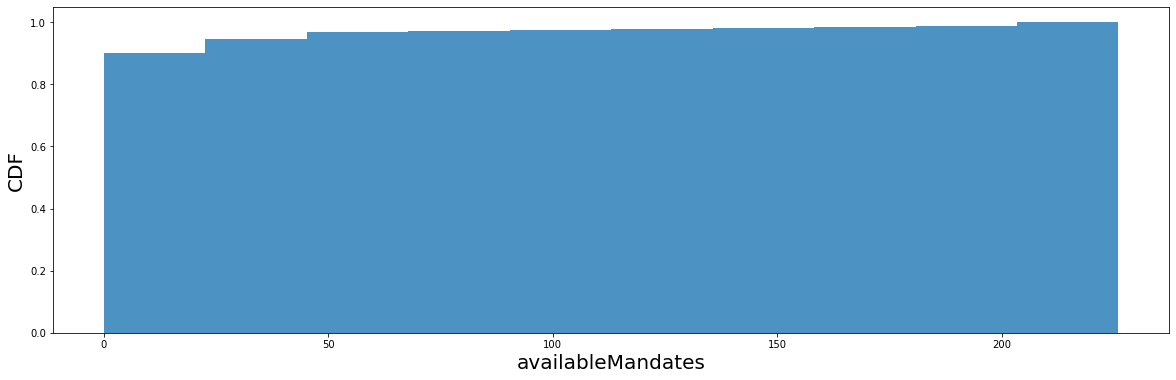

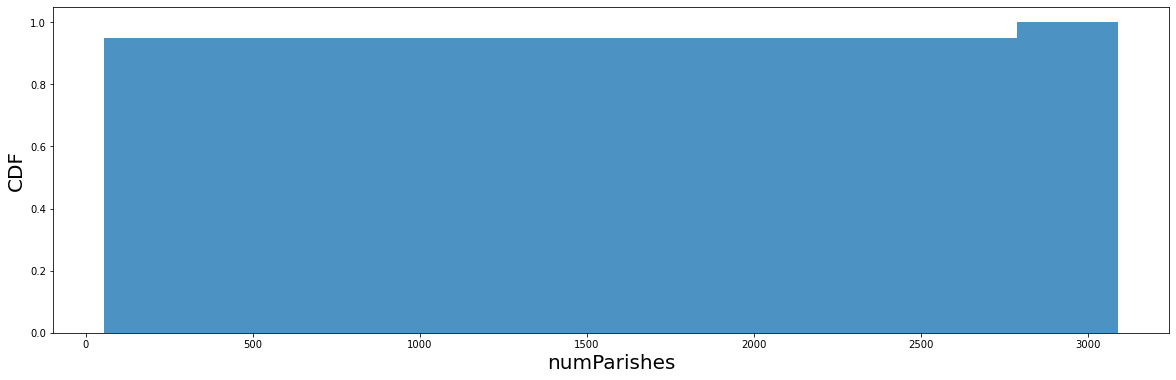

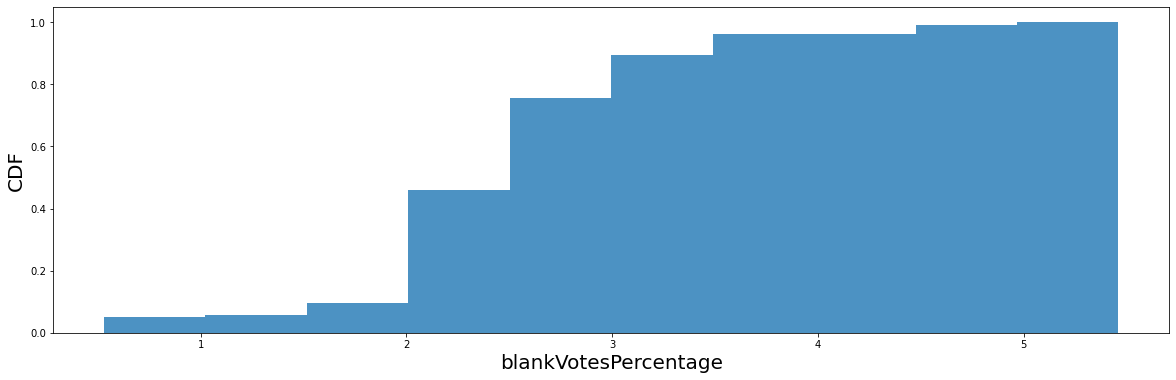

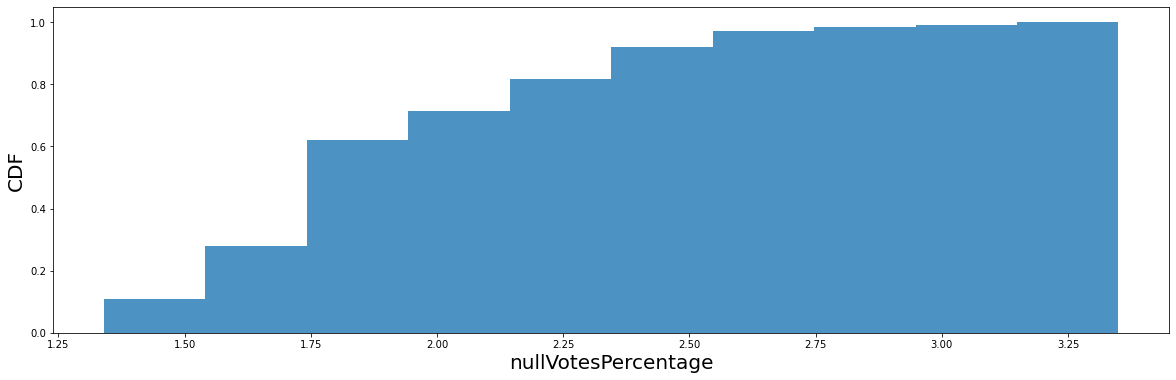

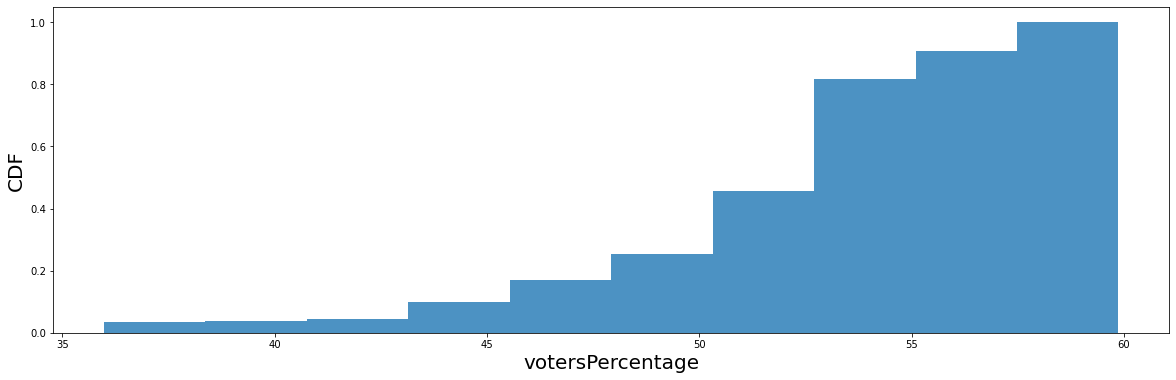

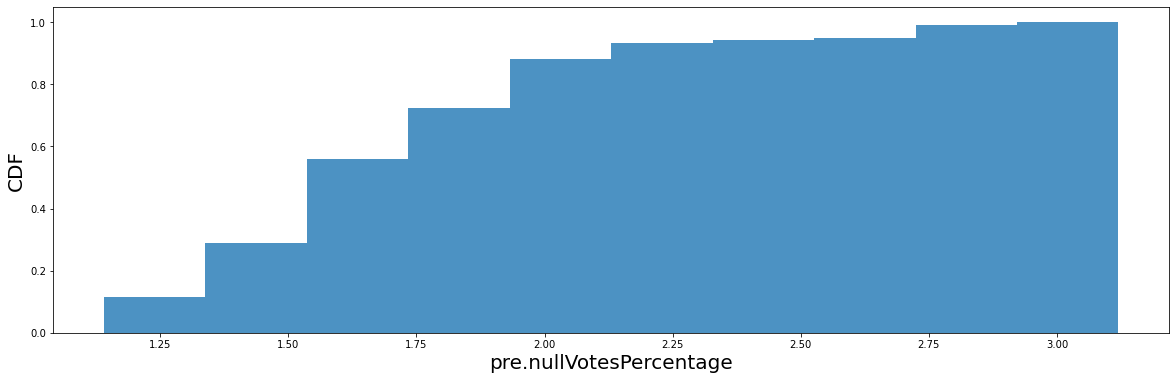

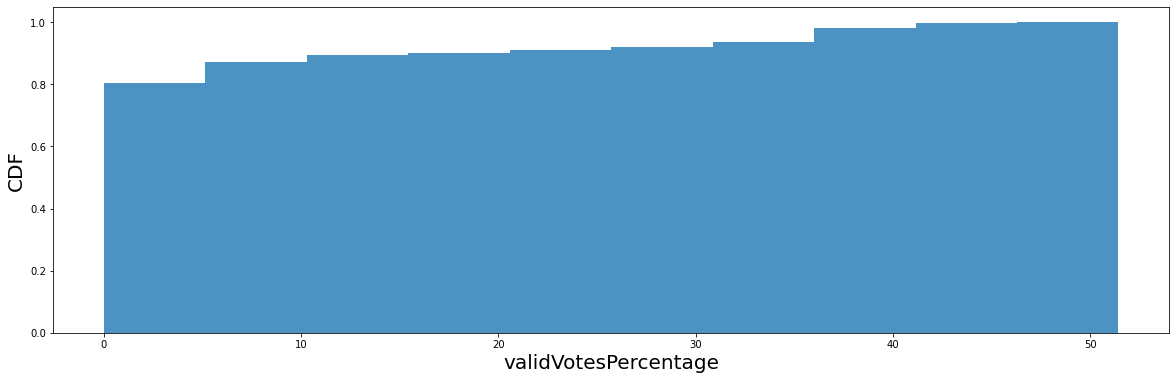

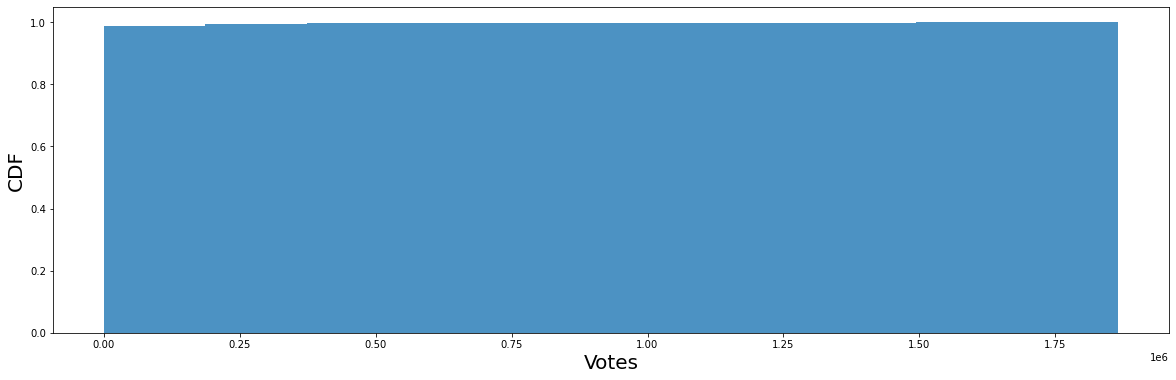

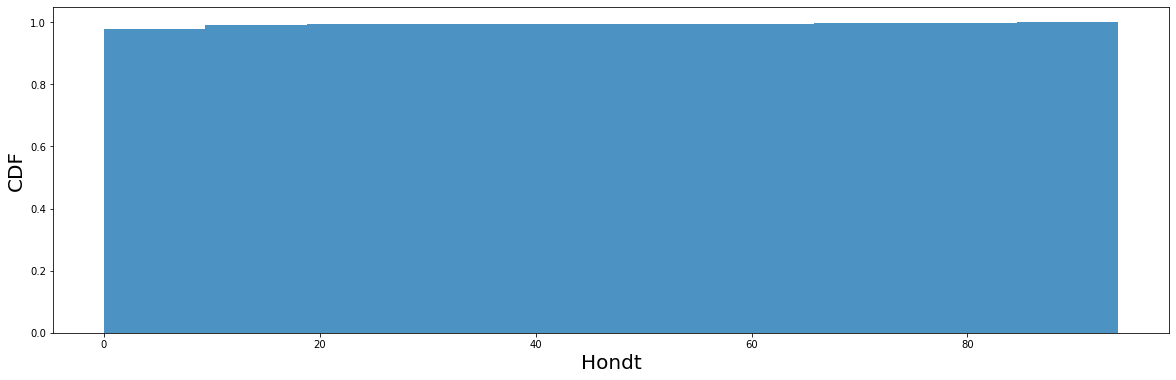

In [23]:
from scipy.stats import norm
def cdf_func(dataset,lists):
    for i in lists:
        plt.figure(figsize=(20,6))
        plt.hist(dataset[i], density=True, cumulative=True,label="CDF", alpha=0.8)
        plt.xlabel(i,fontsize=20)
        plt.ylabel("CDF",fontsize=20)
cdf_func(df,numerical_variables)

## Now we are goin to use chi Square test for finding out if Party & territory Name are related(categorical variables)

#### we will try NULL & Alternatives hypothesis


In [24]:
import scipy.stats as stats
df1_table = pd.crosstab(df["territoryName"],df["Party"])
print(df1_table)

Party                 A  B.E.  CDS-PP  CH  IL  JPP   L  MAS  MPT  NC  ...  \
territoryName                                                         ...   
Aveiro               54    54      54  54  54   54  54    0   54  54  ...   
Açores               47    47      47  47  47    0  47   47   47   0  ...   
Beja                 54    54      54  54  54    0  54    0   54  54  ...   
Braga                54    54      54  54  54   54  54   54   54  54  ...   
Bragança             54    54      54  54  54    0  54    0    0  54  ...   
Castelo Branco       54    54      54  54  54    0  54    0   54   0  ...   
Coimbra              54    54      54  54  54   54  54   54   54  54  ...   
Faro                 54    54      54  54  54    0  54    0   54  54  ...   
Guarda               54    54      54  54  54    0  54    0   54  54  ...   
Leiria               54    54      54  54  54   54  54   54   54  54  ...   
Lisboa               54    54      54  54  54    0  54   54   54  54  ...   

In [25]:
df1_table.values

array([[54, 54, 54, 54, 54, 54, 54,  0, 54, 54, 54, 54, 54, 54, 54, 54,
        54, 54, 54, 54, 54],
       [47, 47, 47, 47, 47,  0, 47, 47, 47,  0, 47, 47, 47, 47, 47, 47,
        47, 47, 47,  0,  0],
       [54, 54, 54, 54, 54,  0, 54,  0, 54, 54, 54, 54, 54, 54, 54, 54,
        54, 54, 54,  0,  0],
       [54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
        54, 54, 54, 54, 54],
       [54, 54, 54, 54, 54,  0, 54,  0,  0, 54, 54, 54, 54, 54, 54, 54,
        54, 54, 54, 54, 54],
       [54, 54, 54, 54, 54,  0, 54,  0, 54,  0, 54, 54, 54, 54, 54, 54,
        54, 54, 54, 54, 54],
       [54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
        54, 54,  0, 54, 54],
       [54, 54, 54, 54, 54,  0, 54,  0, 54, 54, 54, 54, 54, 54, 54, 54,
        54, 54, 54, 54, 54],
       [54, 54, 54, 54, 54,  0, 54,  0, 54, 54, 54, 54, 54, 54, 54, 54,
        54, 54, 54, 54, 54],
       [54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
        54, 54, 54,

In [26]:
Observed_Values =df1_table.values
print("Observed Values :-\n", Observed_Values)

Observed Values :-
 [[54 54 54 54 54 54 54  0 54 54 54 54 54 54 54 54 54 54 54 54 54]
 [47 47 47 47 47  0 47 47 47  0 47 47 47 47 47 47 47 47 47  0  0]
 [54 54 54 54 54  0 54  0 54 54 54 54 54 54 54 54 54 54 54  0  0]
 [54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54  0 54  0  0 54 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54  0 54  0 54  0 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54  0 54 54]
 [54 54 54 54 54  0 54  0 54 54 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54  0 54  0 54 54 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54  0 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54 54 54  0 54 54 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54  0 54  0 54  0 54 54 54 54 54 54  0 54 54 54 54]
 [54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54  0 54  0 54 54 54 54 54 54 54 54 54 54 

In [27]:
val = stats.chi2_contingency(df1_table)
val

(1948.5199687841082,
 1.3607820211281645e-201,
 400,
 array([[56.23804463, 56.23804463, 56.23804463, 56.23804463, 56.23804463,
         24.25172111, 56.23804463, 21.20778081, 50.84877328, 48.50344222,
         56.23804463, 56.23804463, 56.23804463, 56.23804463, 56.23804463,
         56.23804463, 53.54340895, 56.23804463, 50.84877328, 48.50344222,
         51.1980779 ],
        [41.60573858, 41.60573858, 41.60573858, 41.60573858, 41.60573858,
         17.94178256, 41.60573858, 15.68983043, 37.61867578, 35.88356512,
         41.60573858, 41.60573858, 41.60573858, 41.60573858, 41.60573858,
         41.60573858, 39.61220718, 41.60573858, 37.61867578, 35.88356512,
         37.87709652],
        [47.80233794, 47.80233794, 47.80233794, 47.80233794, 47.80233794,
         20.61396294, 47.80233794, 18.02661369, 43.22145728, 41.22792589,
         47.80233794, 47.80233794, 47.80233794, 47.80233794, 47.80233794,
         47.80233794, 45.51189761, 47.80233794, 43.22145728, 41.22792589,
         43.5

In [28]:
Expected_Values=val[3]

no_of_rows = len(df1_table.iloc[0:2,0])
no_of_columns = len(df1_table.iloc[0,0:2])
df2 = (no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df2)
alpha = 0.05

Degree of Freedom:- 1


In [29]:
from scipy.stats import chi2
chi_square = sum([(o-e)**2./e
                   for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistics = chi_square[0]+chi_square[1]

In [30]:
critical_value = chi2.ppf(q=1-alpha,df=df2)
print("chi-square statistics:-", chi_square_statistics)
print("critical_value",critical_value)

chi-square statistics:- 13.878458601485704
critical_value 3.841458820694124


#### Checking p values

In [31]:
p_value=1-chi2.cdf(x=chi_square_statistics,df=df2)
print("p-value:-", p_value)
print("Significant level:-",alpha)
print("Degree of Freedom:-",df2)
print("p-value:-",p_value)

p-value:- 0.00019502095665746566
Significant level:- 0.05
Degree of Freedom:- 1
p-value:- 0.00019502095665746566


In [32]:
if chi_square_statistics>=critical_value:
    print("Reject H0, There is Relationship between 2 categorical variables")
else:
    print("Retain H0,There is No Relationship between 2 categorical variables")

if p_value<=alpha:
    print("Reject H0, There is Relationship between 2 categorical variables")
else:
    print("Retain H0, There is No Relationship between 2 categorical variables")

Reject H0, There is Relationship between 2 categorical variables
Reject H0, There is Relationship between 2 categorical variables


### From chi-square & p-value it is clear that Territoryname & Party are having some kind of  realtionship, let's explore that


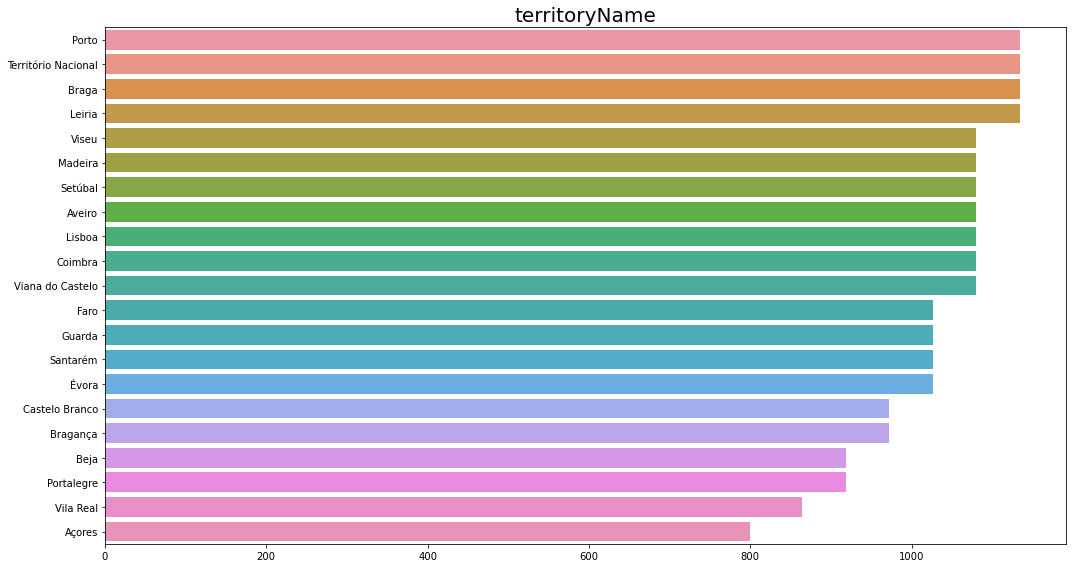

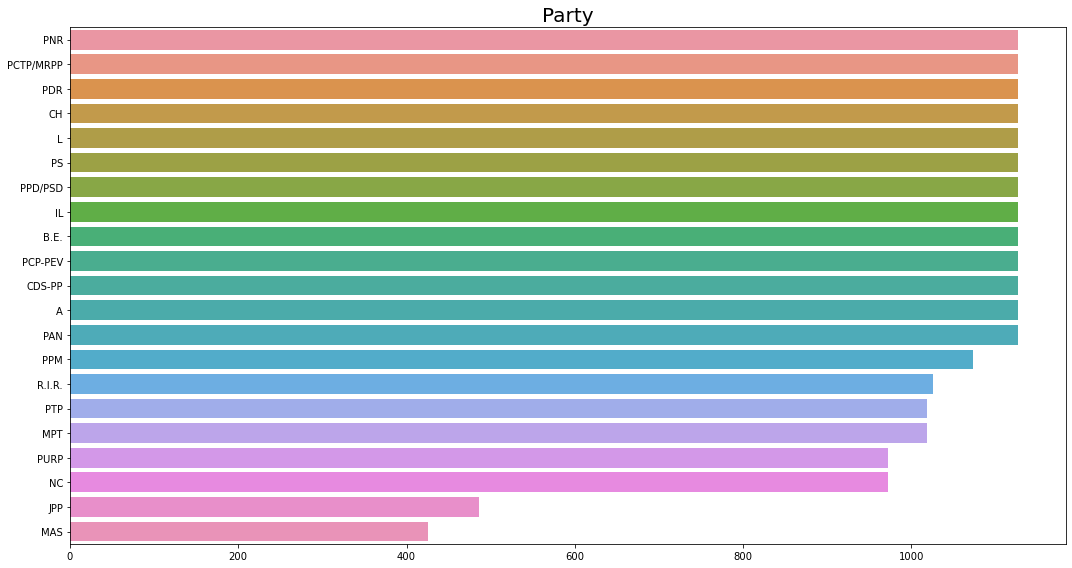

In [33]:
categorical_variables = ["territoryName","Party"]
for col in categorical_variables:
    plt.figure(figsize=(15,8))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col,fontsize=20)
    plt.tight_layout()

##### Half the number of parties are equally dominant from electrion standpointLeiria, Porta,Braga,Viseu are among the largest city in Portugal having a large pool of voters

In [34]:
df.columns

Index(['TimeElapsed', 'time', 'territoryName', 'availableMandates',
       'numParishes', 'blankVotesPercentage', 'nullVotesPercentage',
       'votersPercentage', 'pre.nullVotesPercentage', 'Party',
       'validVotesPercentage', 'Votes', 'Hondt', 'FinalMandates'],
      dtype='object')

## Categorical Analysis

In [35]:
pd.options.display.max_rows
pd.set_option("display.max_rows",None)

pd.pivot_table(df, index=["territoryName","availableMandates"],values = "numParishes").sort_values("numParishes",ascending=False)

numParishes
territoryName       availableMandates             
Território Nacional 25                        3092
                    0                         3092
                    101                       3092
                    116                       3092
                    130                       3092
                    226                       3092
                    214                       3092
                    17                        3092
                    139                       3092
                    144                       3092
                    158                       3092
                    9                         3092
                    162                       3092
                    212                       3092
                    210                       3092
                    204                       3092
                    199                       3092
                    190                       3092
                    15                        3092
                    16                        3092
                    189                       3092
                    175                       3092
                    97                        3092
                    165                       3092
                    77                        3092
                    94                        3092
                    29                        3092
                    38                        3092
                    41                        3092
                    42                        3092
                    48                        3092
                    50                        3092
                    53                        3092
                    63                        3092
                    82                        3092
Braga               13                         347
                    12                         347
                    0                          347
                    5                          347
                    6                          347
                    7                          347
                    8                          347
                    9                          347
                    19                         347
                    16                         347
                    15                         347
                    10                         347
                    14                         347
Viseu               0                          277
                    4                          277
                    6                          277
                    8                          277
Porto               14                         243
                    40                         243
                    25                         243
                    35                         243
                    34                         243
                    33                         243
                    31                         243
                    30                         243
                    28                         243
                    26                         243
                    24                         243
                    0                          243
                    22                         243
                    21                         243
                    20                         243
                    38                         243
                    12                         243
                    10                         243
                    8                          243
                    9                          243
                    36                         243
                    37                         243
Guarda              0                          242
                    3                          242
Bragança            3                          226
          

##### National capital region has the most number of Parishes & having most number of parliamentary seats.

## Partywise votes

In [36]:
pd.pivot_table(df, index="Party", values="blankVotesPercentage").sort_values("blankVotesPercentage",ascending=False)

,blankVotesPercentage
Party,
MAS,3.033035
JPP,2.710329
MPT,2.671384
PPM,2.638211
A,2.618181
PCP-PEV,2.618181
PS,2.618181
PPD/PSD,2.618181
PNR,2.618181


In [37]:
pd.pivot_table(df, index = "Party", values = "nullVotesPercentage").sort_values("nullVotesPercentage", ascending=False)

,nullVotesPercentage
Party,
R.I.R.,1.995624
PURP,1.970031
PPM,1.967875
B.E.,1.965741
PS,1.965741
PPD/PSD,1.965741
PNR,1.965741
PDR,1.965741
PCTP/MRPP,1.965741


In [38]:
pd.pivot_table(df,index="Party", values="validVotesPercentage").sort_values("validVotesPercentage", ascending=False)

,validVotesPercentage
Party,
PS,39.513789
PPD/PSD,30.498900
B.E.,8.941145
PCP-PEV,6.982227
CDS-PP,4.674836
PAN,2.544020
CH,1.362236
PCTP/MRPP,0.780195
R.I.R.,0.763733


##### MAS = 3.0 blank votes
##### RIR = 1.99 null votes
##### PS = 39.5 valid votes
###### above parties has the most number of votes and rest of Party's are almost having same percentage of votes

In [39]:
pd.pivot_table(df,index="Party", values="FinalMandates", aggfunc=np.mean).sort_values("FinalMandates",ascending=False)

,FinalMandates
Party,
PS,10.139308
PPD/PSD,7.366460
B.E.,1.820763
PCP-PEV,1.149956
CDS-PP,0.479148
PAN,0.383319
CH,0.095830
IL,0.095830
L,0.095830


In [40]:
pd.pivot_table(df,index = "territoryName", values="FinalMandates", aggfunc="count").sort_values("FinalMandates",ascending=False)

,FinalMandates
territoryName,
Leiria,1134
Braga,1134
Território Nacional,1134
Porto,1134
Aveiro,1080
Viseu,1080
Viana do Castelo,1080
Setúbal,1080
Madeira,1080


##### From above After analysis of data partywise we can say there are 3 parties by final mandates :-  PS, PPD/PSD/ B.E.

In [41]:
# again checking null values after processed
df.isnull().sum()

TimeElapsed                0
time                       0
territoryName              0
availableMandates          0
numParishes                0
blankVotesPercentage       0
nullVotesPercentage        0
votersPercentage           0
pre.nullVotesPercentage    0
Party                      0
validVotesPercentage       0
Votes                      0
Hondt                      0
FinalMandates              0
dtype: int64

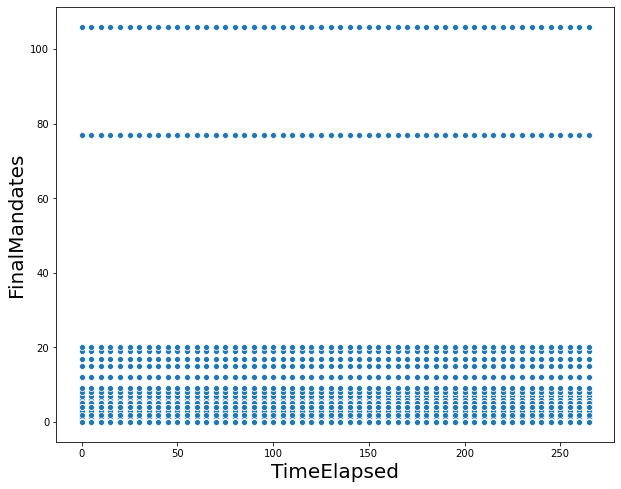

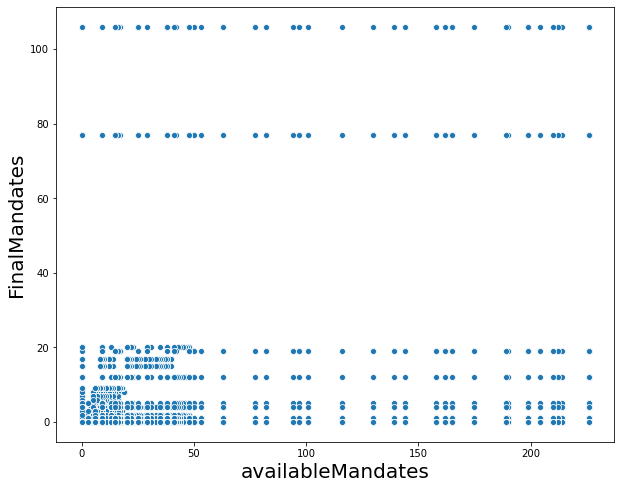

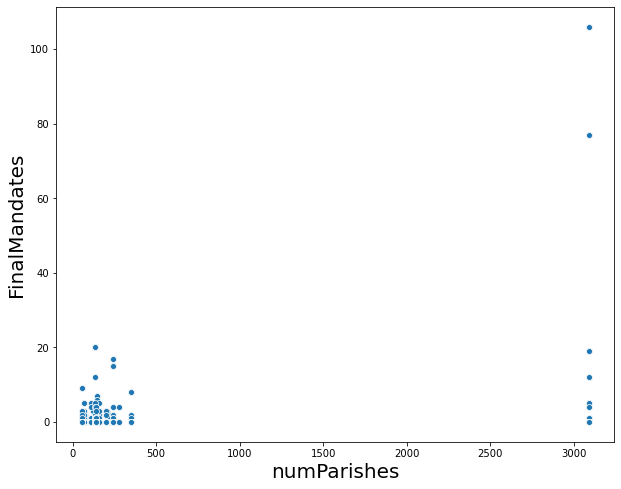

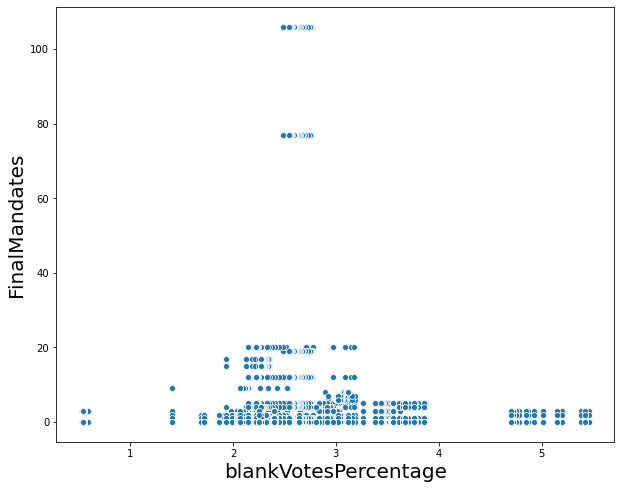

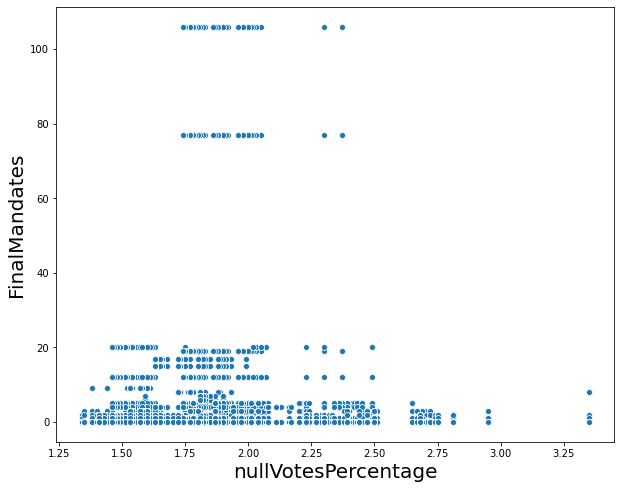

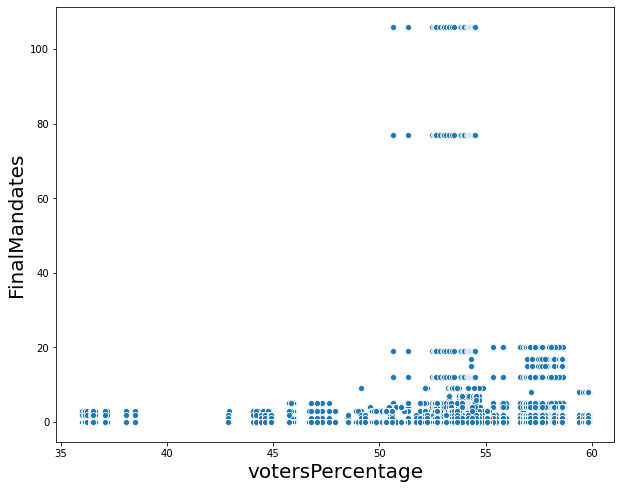

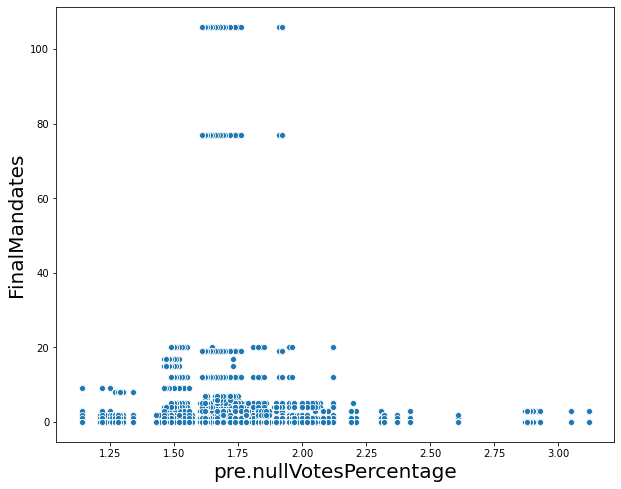

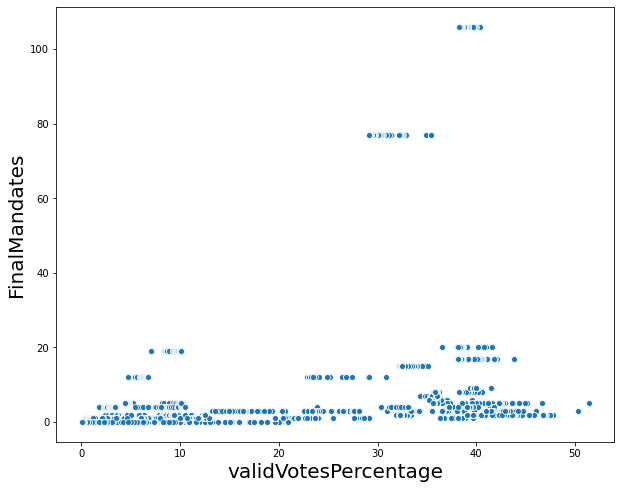

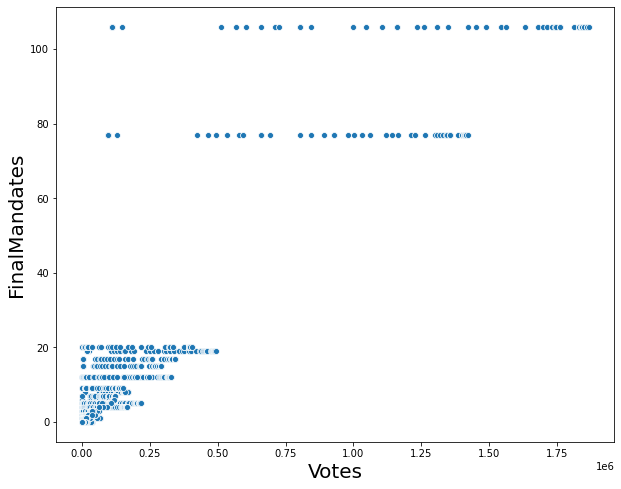

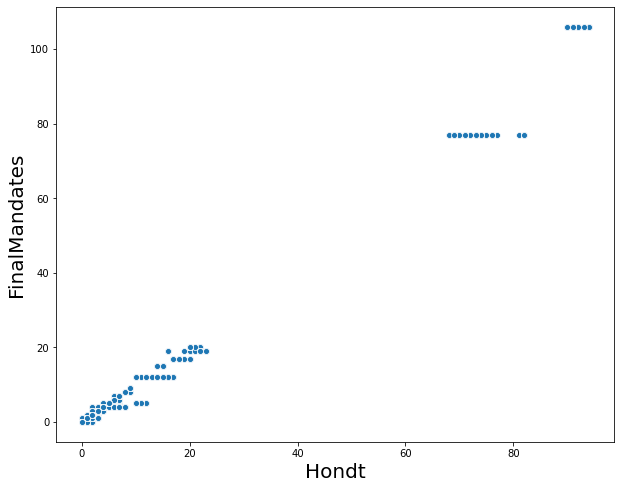

In [42]:
def scatter_func(df1,lists):
    for i in lists:
        plt.figure(figsize=(10,8))
        sns.scatterplot(x=df1[i], y=df1["FinalMandates"],data=df1)
        plt.xlabel(i,fontsize=20)
        plt.ylabel("FinalMandates",fontsize=20)
scatter_func(df,numerical_variables)

##### There is a linear relationship between votes, hondt, & finalmandates, lldistribution having siginificant outliers. Independent data points comparing with dependent variable is a static.

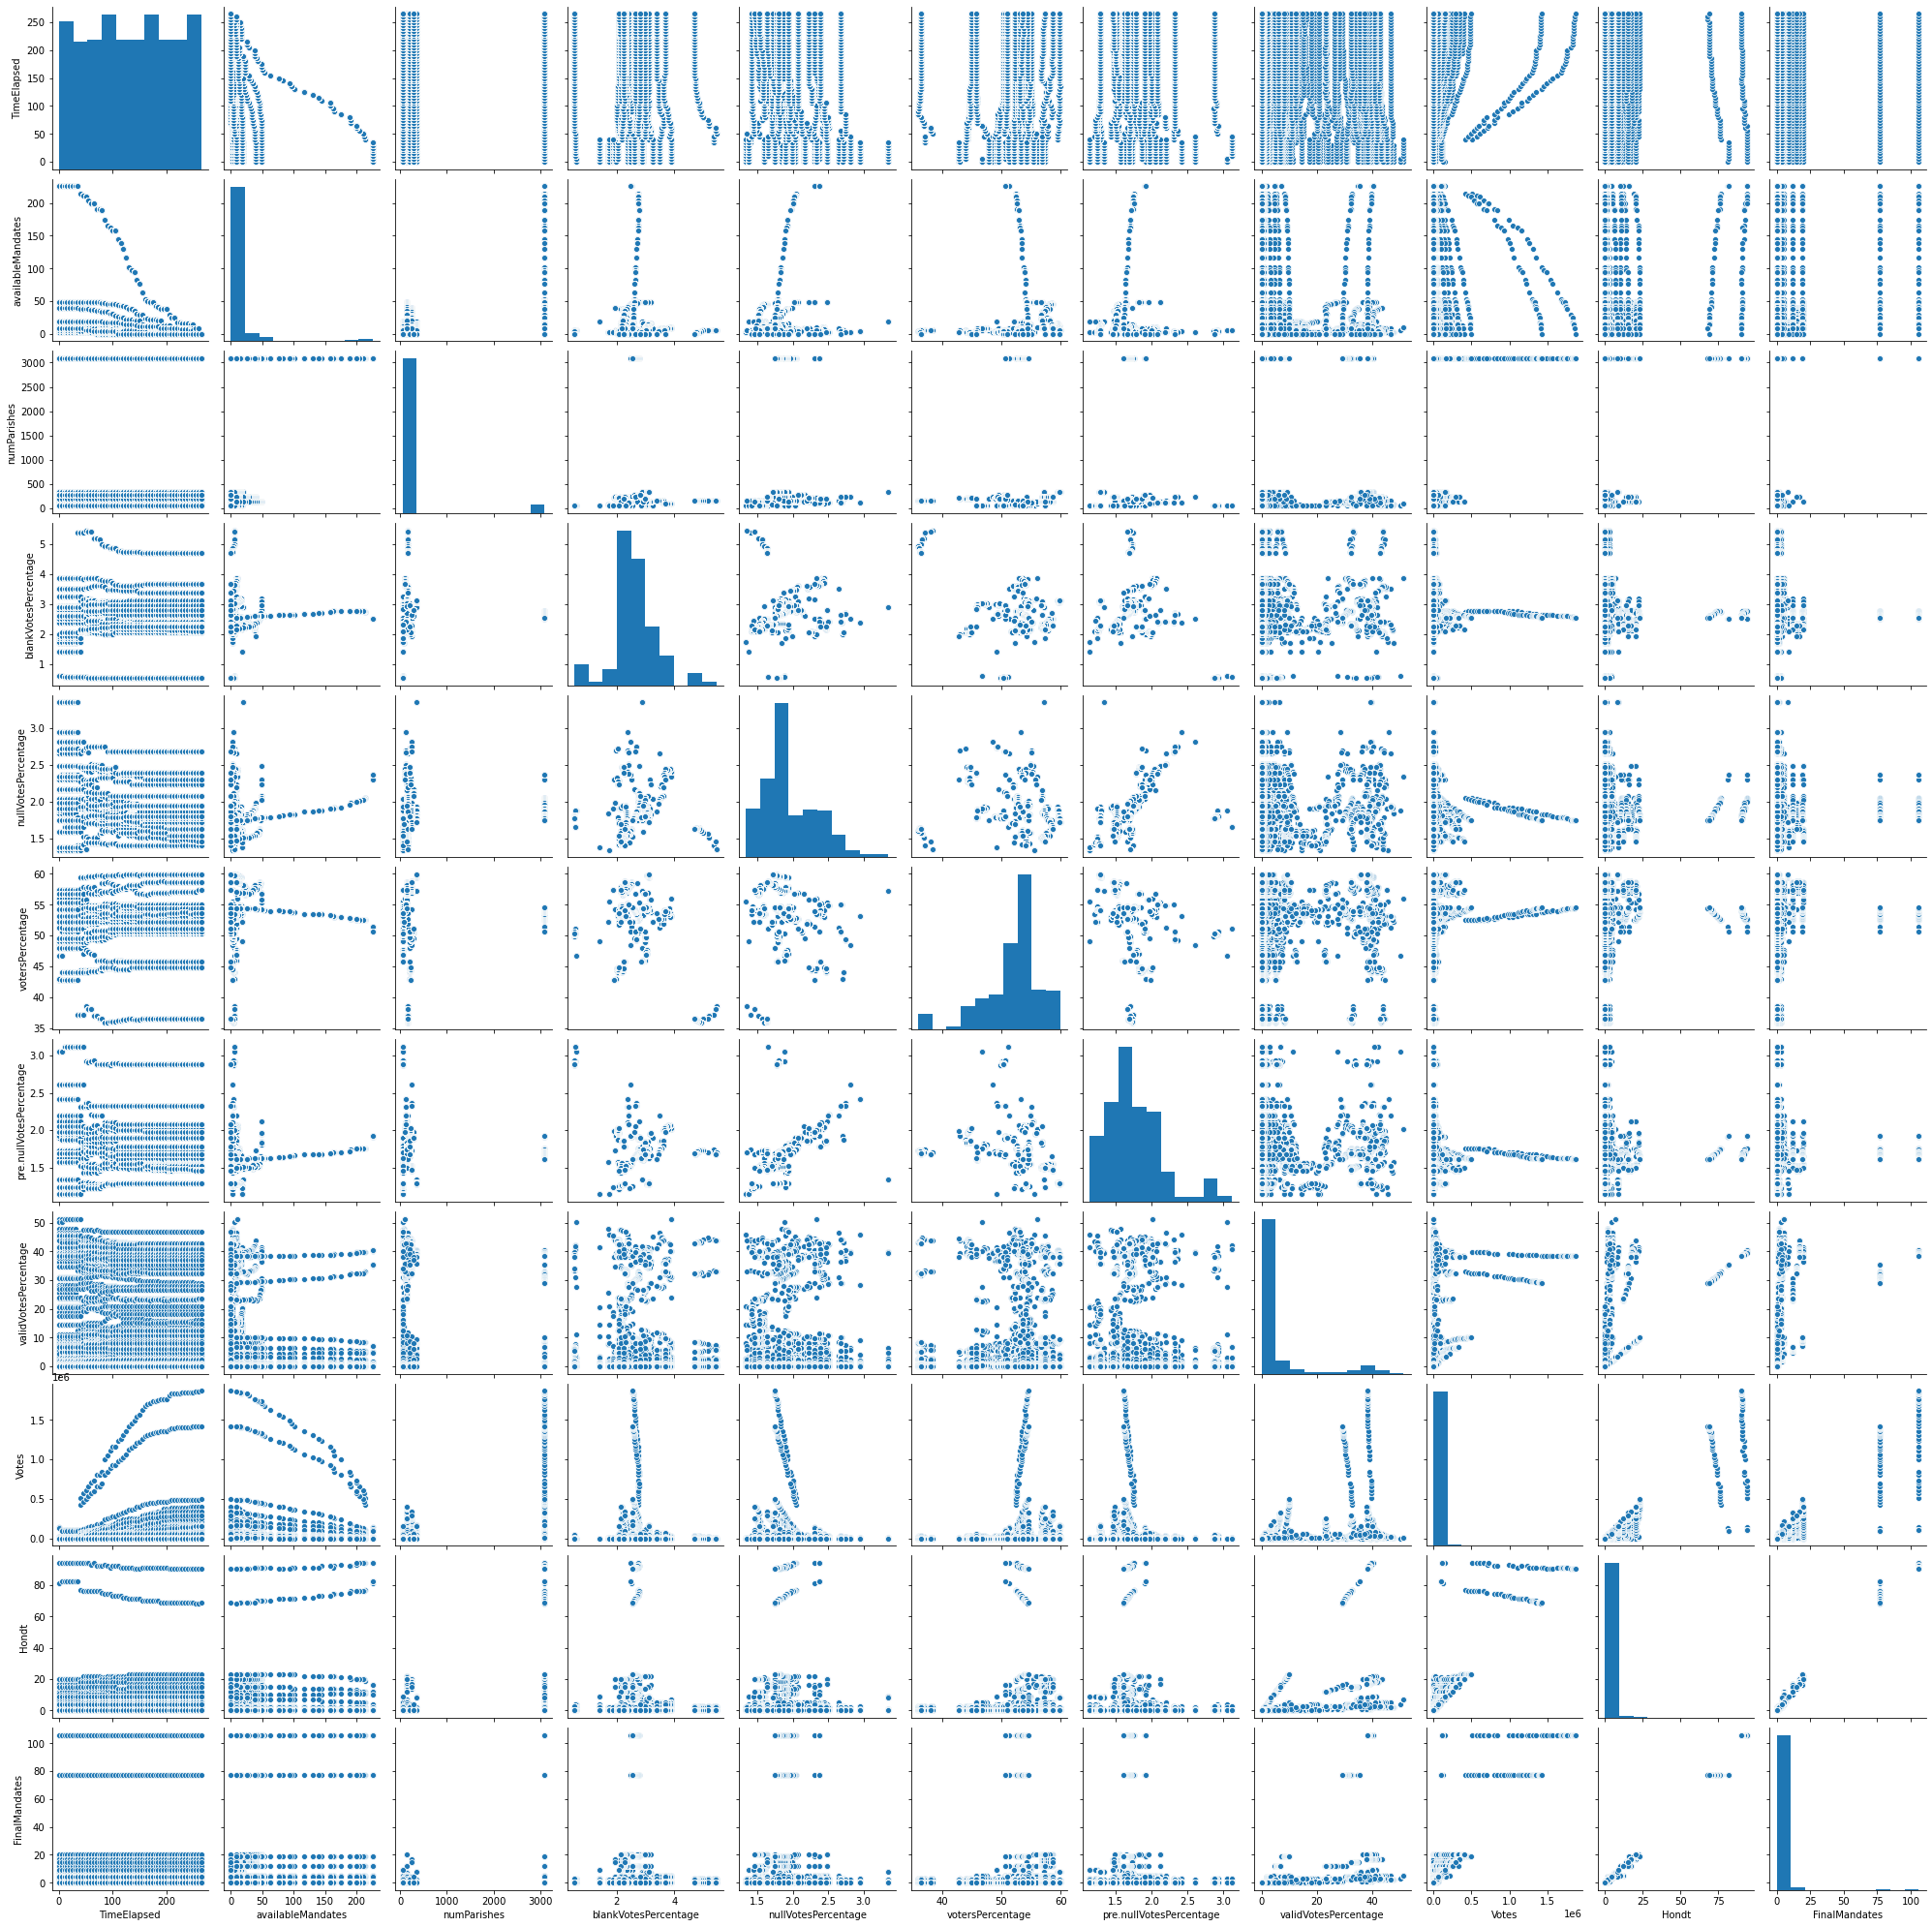

In [43]:
sns.pairplot(data=df)

##### availablemandates, validVotesPercentage, Votes & Hondt are linear with Final Mandates

###### Ouitliers Points

In [44]:
q1 = df[numerical_variables].quantile(0.75)
q2 = df[numerical_variables].quantile(0.25)
iqr = q1 -q2
print("IQR for numerical attributes")
print(iqr)

IQR for numerical attributes
TimeElapsed                 135.00
availableMandates             9.00
numParishes                 167.00
blankVotesPercentage          0.75
nullVotesPercentage           0.51
votersPercentage              4.26
pre.nullVotesPercentage       0.45
validVotesPercentage          2.93
Votes                      4274.00
Hondt                         0.00
dtype: float64


In [45]:
df_numerical = df[numerical_variables]
df_out = df[~((df_numerical < (q2-1.5 *iqr)) | (df_numerical > (q1 + 1.5 * iqr))).any(axis=1)]
print("{} points are outliers based on IQR".format(df.shape[0] - df_out.shape[0]))

7875 points are outliers based on IQR


## Label Encoders for encoding of categorical variables

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TimeElapsed              21643 non-null  int64  
 1   time                     21643 non-null  object 
 2   territoryName            21643 non-null  object 
 3   availableMandates        21643 non-null  int64  
 4   numParishes              21643 non-null  int64  
 5   blankVotesPercentage     21643 non-null  float64
 6   nullVotesPercentage      21643 non-null  float64
 7   votersPercentage         21643 non-null  float64
 8   pre.nullVotesPercentage  21643 non-null  float64
 9   Party                    21643 non-null  object 
 10  validVotesPercentage     21643 non-null  float64
 11  Votes                    21643 non-null  int64  
 12  Hondt                    21643 non-null  int64  
 13  FinalMandates            21643 non-null  int64  
dtypes: float64(5), int64(6

##### here we have time in string format we have to change it first before applying Encoders

In [47]:
df["Dates"] = pd.to_datetime(df["time"]).dt.date
df["Time"] = pd.to_datetime(df["time"]).dt.time
df.head()

,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates,Dates,Time
0,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PS,40.22,147993,94,106,2019-10-06,20:10:02
1,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PPD/PSD,34.95,128624,81,77,2019-10-06,20:10:02
2,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,B.E.,7.15,26307,16,19,2019-10-06,20:10:02
3,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,CDS-PP,5.14,18923,12,5,2019-10-06,20:10:02
4,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PCP-PEV,4.83,17757,11,12,2019-10-06,20:10:02


In [48]:
# droping unw3anted columns 
df.drop(["time"],axis=1,inplace=True)

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Dates_encoded"] = pd.DataFrame(le.fit_transform(df.Dates))
df["TimeElapsed"] = pd.DataFrame(le.fit_transform(df.Time))
df["territoryNmae_encoded"] = pd.DataFrame(le.fit_transform(df.territoryName))

In [50]:
df.head()

,TimeElapsed,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates,Dates,Time,Dates_encoded,territoryNmae_encoded
0,8,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PS,40.22,147993,94,106,2019-10-06,20:10:02,0,16
1,8,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PPD/PSD,34.95,128624,81,77,2019-10-06,20:10:02,0,16
2,8,Território Nacional,226,3092,2.5,2.3,51.36,1.91,B.E.,7.15,26307,16,19,2019-10-06,20:10:02,0,16
3,8,Território Nacional,226,3092,2.5,2.3,51.36,1.91,CDS-PP,5.14,18923,12,5,2019-10-06,20:10:02,0,16
4,8,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PCP-PEV,4.83,17757,11,12,2019-10-06,20:10:02,0,16


In [51]:
df.drop(["Time","territoryName","Dates"],axis=1,inplace=True)


### Normalization

In [52]:
party_mean_encoded = pd.Series(df["Party"].value_counts()) / len(df["Party"])
x=party_mean_encoded.to_dict()
df["Party_encoded"]=df["Party"].map(x)
df.head()

,TimeElapsed,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates,Dates_encoded,territoryNmae_encoded,Party_encoded
0,8,226,3092,2.5,2.3,51.36,1.91,PS,40.22,147993,94,106,0,16,0.052072
1,8,226,3092,2.5,2.3,51.36,1.91,PPD/PSD,34.95,128624,81,77,0,16,0.052072
2,8,226,3092,2.5,2.3,51.36,1.91,B.E.,7.15,26307,16,19,0,16,0.052072
3,8,226,3092,2.5,2.3,51.36,1.91,CDS-PP,5.14,18923,12,5,0,16,0.052072
4,8,226,3092,2.5,2.3,51.36,1.91,PCP-PEV,4.83,17757,11,12,0,16,0.052072


In [53]:
df.drop(["Party"],axis=1, inplace=True)
df.head()

,TimeElapsed,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,validVotesPercentage,Votes,Hondt,FinalMandates,Dates_encoded,territoryNmae_encoded,Party_encoded
0,8,226,3092,2.5,2.3,51.36,1.91,40.22,147993,94,106,0,16,0.052072
1,8,226,3092,2.5,2.3,51.36,1.91,34.95,128624,81,77,0,16,0.052072
2,8,226,3092,2.5,2.3,51.36,1.91,7.15,26307,16,19,0,16,0.052072
3,8,226,3092,2.5,2.3,51.36,1.91,5.14,18923,12,5,0,16,0.052072
4,8,226,3092,2.5,2.3,51.36,1.91,4.83,17757,11,12,0,16,0.052072


## Standardization

In [54]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss.fit(df.drop("FinalMandates",axis=1))
ss_features = ss.transform(df.drop("FinalMandates",axis=1))
df1_ss = pd.DataFrame(ss_features, columns=df.columns[:-1])
df1_ss.head()

,TimeElapsed,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,validVotesPercentage,Votes,Hondt,FinalMandates,Dates_encoded,territoryNmae_encoded
0,-1.192483,6.758472,4.221354,-0.152941,0.902163,-0.128489,0.340951,3.217832,1.419284,14.757327,-0.418374,0.982968,0.430888
1,-1.192483,6.758472,4.221354,-0.152941,0.902163,-0.128489,0.340951,2.733495,1.211248,12.691673,-0.418374,0.982968,0.430888
2,-1.192483,6.758472,4.221354,-0.152941,0.902163,-0.128489,0.340951,0.178549,0.112293,2.363404,-0.418374,0.982968,0.430888
3,-1.192483,6.758472,4.221354,-0.152941,0.902163,-0.128489,0.340951,-0.006179,0.032984,1.727818,-0.418374,0.982968,0.430888
4,-1.192483,6.758472,4.221354,-0.152941,0.902163,-0.128489,0.340951,-0.034669,0.020460,1.568922,-0.418374,0.982968,0.430888


### Spliting dataset

In [55]:
from sklearn.model_selection import train_test_split

X = df.drop(["FinalMandates"],axis=1)
y = df["FinalMandates"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16232, 13) (16232,)
(5411, 13) (5411,)


## Feature importances

In [56]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.00319173 0.02834426 0.04460936 0.02385673 0.01627165 0.02108562
 0.02154805 0.32088023 0.15477719 0.31300946 0.00085332 0.03351634
 0.01805607]


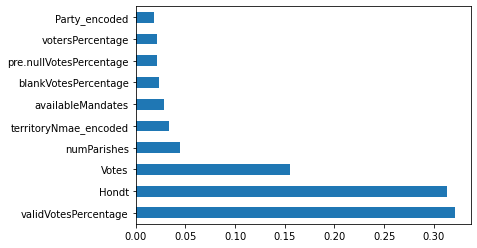

In [57]:
# to understand above features we plot a graph
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind="barh")
plt.show()

##### ValidVotesPercentage & Hondt are the most important features for determining the Final Mandates, accounting 30 % each.

### Let's see the Correlation for above fearure

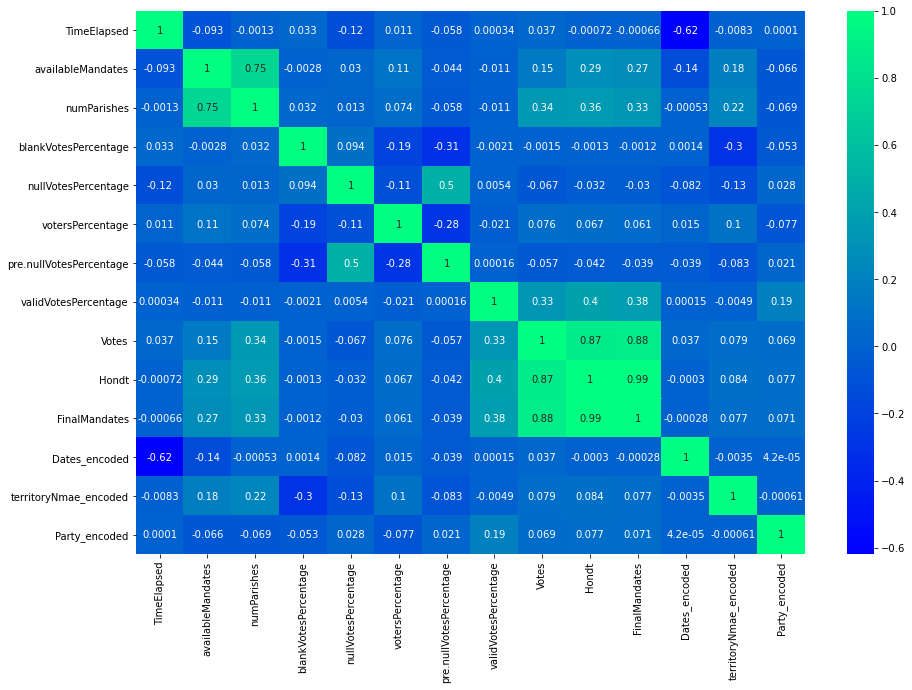

In [58]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))

g =sns.heatmap(df[top_corr_features].corr(), annot=True,cmap="winter")

[Text(1, 0.5, 'availableMandates'),
 Text(1, 1.5, 'numParishes'),
 Text(1, 2.5, 'votersPercentage'),
 Text(1, 3.5, 'territoryNmae_encoded'),
 Text(1, 4.5, 'Votes'),
 Text(1, 5.5, 'Hondt'),
 Text(1, 6.5, 'FinalMandates'),
 Text(1, 7.5, 'validVotesPercentage'),
 Text(1, 8.5, 'Party_encoded'),
 Text(1, 9.5, 'TimeElapsed'),
 Text(1, 10.5, 'blankVotesPercentage'),
 Text(1, 11.5, 'Dates_encoded'),
 Text(1, 12.5, 'nullVotesPercentage'),
 Text(1, 13.5, 'pre.nullVotesPercentage')]

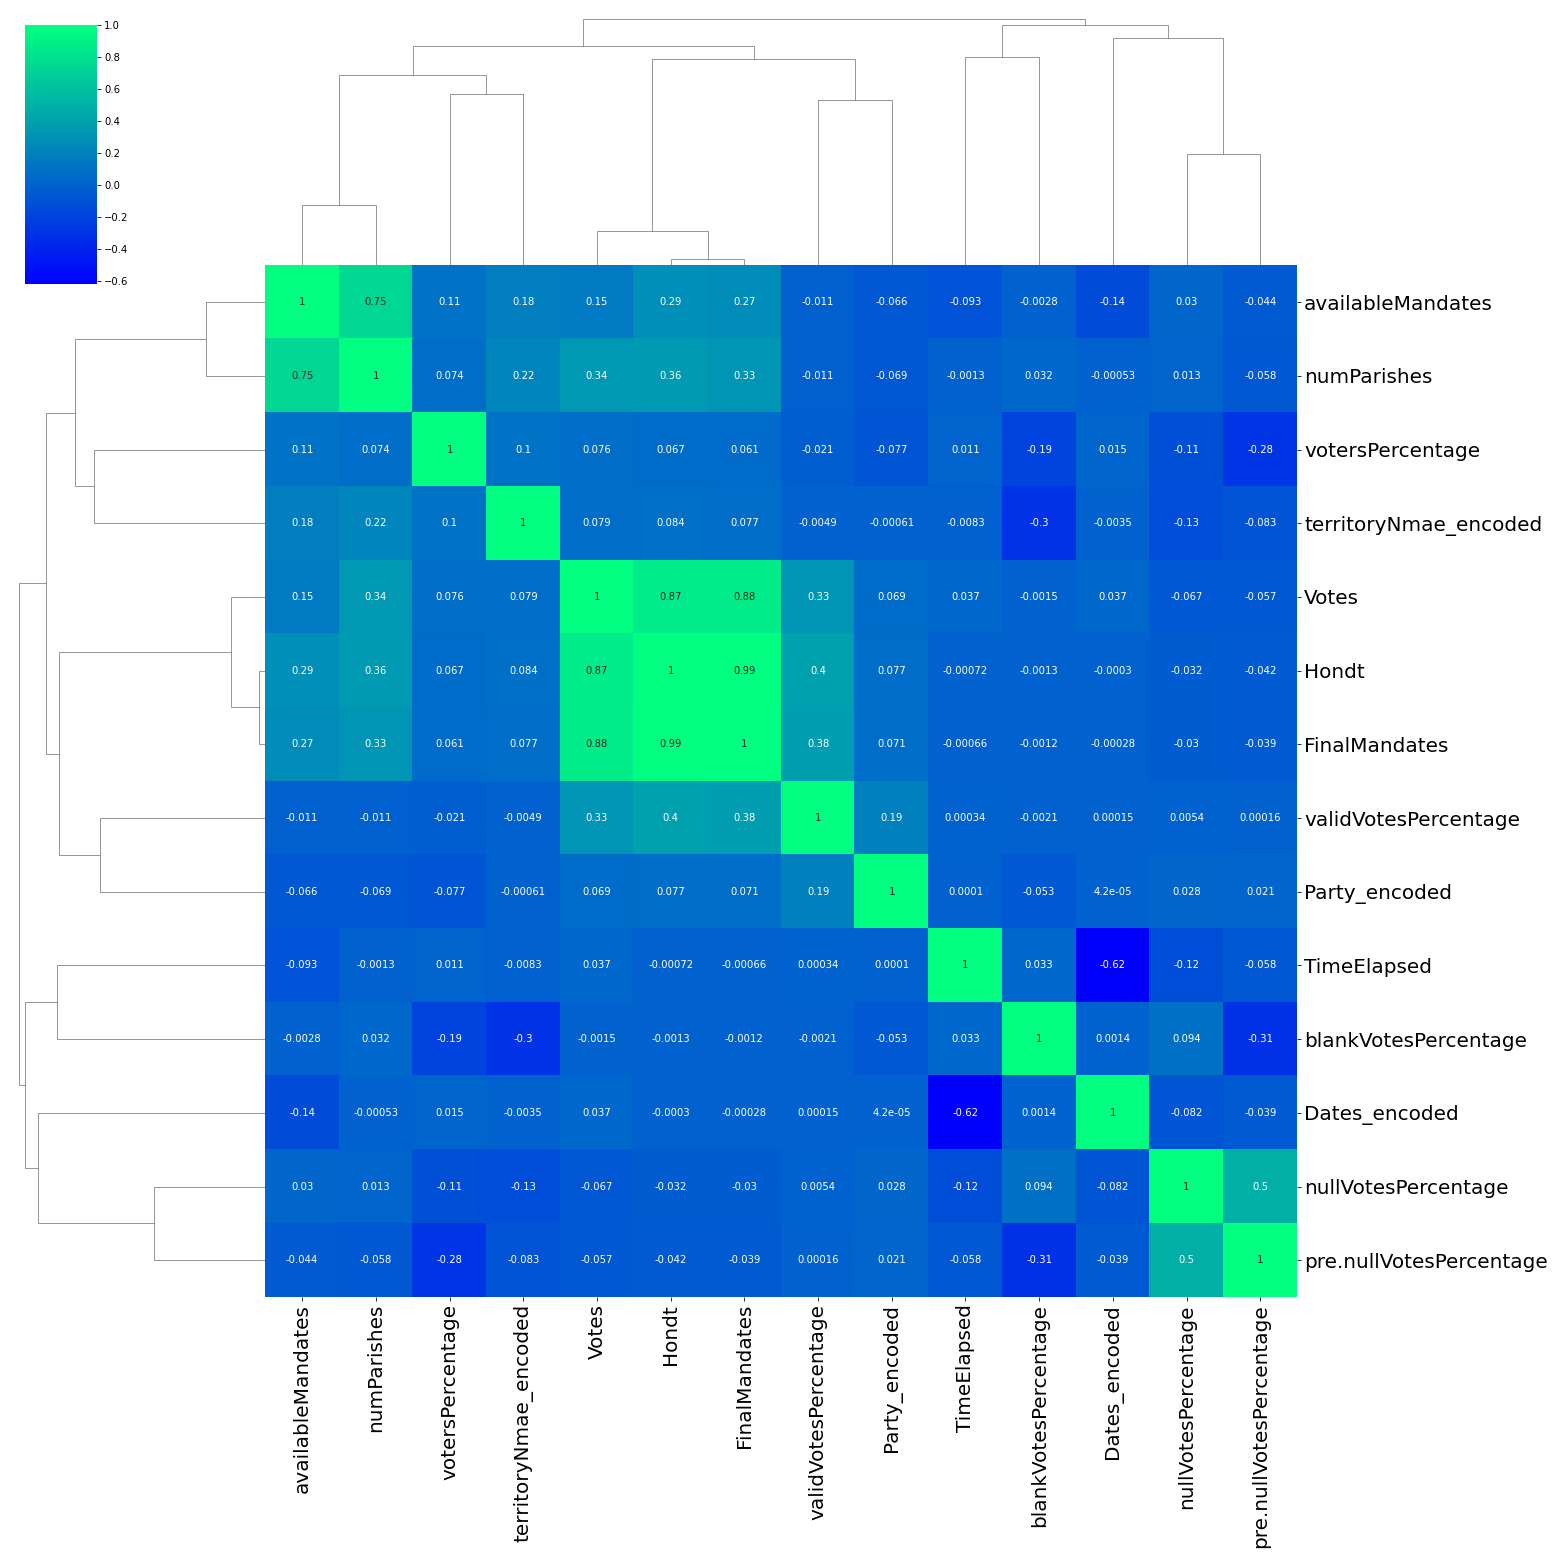

In [59]:
corr=df.corr().mul(100).astype(int)
top_corr_features = corr.index

g = sns.clustermap(data=df[top_corr_features].corr(), annot=True,cmap="winter",figsize=(20,20))
cmap = sns.diverging_palette(h_neg=500, h_pos=100, s=100, l=0, as_cmap=True)

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize=20)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(),fontsize=20)

##### After seeing both heatmap, we can clearly say that FinalMandates, Hondt & Votes high correlated. if we see other features  availableMandates & numParishes are also correlated but not highly correlated.




## Models 

### Decision Tree Regression

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

dt = DecisionTreeRegressor(random_state=0).fit(X,y)

In [61]:
from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(dt, X_train, y_train, scoring="neg_mean_squared_error",cv=20)
tree_rmse_scores = np.sqrt(-tree_scores)


def display_scores(scores):
    print("Scores:", scores)
    print("Mean:",scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)


Scores: [0.04962917 0.24565184 0.05263968 0.06078307 0.0784706  0.25306009
 0.06078307 0.03509312 0.04962917 0.08596024 0.04962917 0.09925833
 0.26041795 0.         0.06082053 0.06082053 0.06082053 0.03511475
 0.10534425 0.17990955]
Mean: 0.09419178169865403
Standard deviation: 0.0750783018894291


## Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
print("Model: Linear Regression")
lin_reg=LinearRegression()

tree_scores = cross_val_score(lin_reg, X_train, y_train, scoring = "neg_mean_squared_error", cv=20)
tree_rmse_score=np.sqrt(-tree_scores)

def display_scores(scores):
    print("SCorres:",scores)
    print("Mean:", scores.mean())
    print("Standard deviation",scores.std())

display_scores(tree_rmse_scores)


Model: Linear Regression
SCorres: [0.04962917 0.24565184 0.05263968 0.06078307 0.0784706  0.25306009
 0.06078307 0.03509312 0.04962917 0.08596024 0.04962917 0.09925833
 0.26041795 0.         0.06082053 0.06082053 0.06082053 0.03511475
 0.10534425 0.17990955]
Mean: 0.09419178169865403
Standard deviation 0.0750783018894291


## Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor
print("Model: Random Forest Regressor")
forest_reg =RandomForestRegressor()

tree_scores = cross_val_score(forest_reg,X_train,y_train,scoring="neg_mean_squared_error", cv=20)
tree_rmse_scores = np.sqrt(-tree_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:",scores.std())

display_scores(tree_rmse_scores)



Model: Random Forest Regressor
Scores: [0.06706092 0.16544992 0.06701024 0.0512035  0.07982586 0.12594422
 0.06497848 0.02610607 0.05123596 0.08097114 0.04829864 0.07914199
 0.21011398 0.022537   0.07984726 0.04387098 0.04735492 0.02449049
 0.08213376 0.09733689]
Mean: 0.07574561049883795
Standard deviation: 0.04537031725011489


##### From above models the Random Forest model is best model with the smallest standard deviation, so we are going to tune up the model.

### Now we are going to do hyperparameter tunning with grid search using cross validation
##### This way will be able to tune up our model without splitting our dataset

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = [{"n_estimators":[50,100,200], "max_features":[5,10,15,18],
              "bootstrap": [True,False], "min_samples_leaf":[1,2],
               "min_samples_split":[2,3]}]

forest_reg = RandomForestRegressor()
grid_search =GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error",verbose=1)

grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  8.9min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True, False],
                          'max_features': [5, 10, 15, 18],
                          'min_samples_leaf': [1, 2],
                          'min_samples_split': [2, 3],
                          'n_estimators': [50, 100, 200]}],
             scoring='neg_mean_squared_error', verbose=1)

In [65]:
print("GRID SEARCH INFO")
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print("Best CV Score:-", np.sqrt(-grid_search.best_score_))

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score),params)

GRID SEARCH INFO
RandomForestRegressor(max_features=10, min_samples_split=3, n_estimators=200)
{'bootstrap': True, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Best CV Score:- 0.07837832944296612
0.11935145549167855 {'bootstrap': True, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.0955367855019464 {'bootstrap': True, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.10519079938257721 {'bootstrap': True, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.11722740080987916 {'bootstrap': True, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}
0.09609032705613597 {'bootstrap': True, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
0.11630577389104867 {'bootstrap': True, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
0.

### As we can see the all parameters with best CV score

In [66]:
from sklearn.metrics import mean_squared_error
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.08228467441375549

from sklearn import metrics
print("R2_Score:-", metrics.r2_score(y_test,final_predictions))

#### R^2_Score is very close to 1, regressor model is doing really well, with this type of dataset 

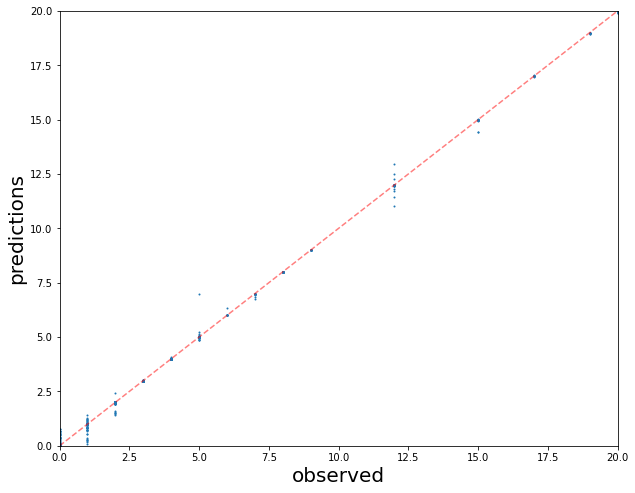

In [67]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, final_predictions, alpha=1, s=1)
plt.xlabel("observed",fontsize=20)
plt.ylabel("predictions", fontsize=20)
plt.plot([0,(np.max(y_test) + 5000)],[0,(np.max(y_test) + 5000)], "r--",alpha=0.5)
plt.axis([0,20,0,20])
plt.show()

#### Blue dots are showing our predictions, in this case most of the points are closer to the line

### Now we are going to interpret the model, we are using this to justify our predictions & for better understanding of how each features affects the target variable

In [68]:
row = X_test.values[None,0]
row

array([[5.20000000e+01, 0.00000000e+00, 6.90000000e+01, 2.32000000e+00,
        1.93000000e+00, 5.31300000e+01, 1.52000000e+00, 1.20000000e-01,
        6.10000000e+01, 0.00000000e+00, 0.00000000e+00, 1.20000000e+01,
        4.70821975e-02]])

##### we are going to use our Best model, it is Linear Regression. In this Tree interpreter provides us the prediction,bias of the transiet & contributions to prediction for each feature

In [69]:
from treeinterpreter import treeinterpreter as ti
prediction, bias, contributions = ti.predict(model, row)
prediction[0],bias[0]

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.82349951, 0.05239569, 0.032112  , 0.02961697, 0.01746523,
        0.01247517, 0.00249503, 0.00249503, 0.00499007, 0.00249503,
        0.00499007, 0.00249503, 0.00249503, 0.00249503, 0.00249503,
        0.00249503, 0.00249503]))

In [70]:
lin_reg.fit(X_train,y_train)
lin_reg_pred = lin_reg.predict(X_test)

In [71]:
print(lin_reg.predict(row))

[0.03730081]


In [72]:
for c, feature in zip(contributions[0], X.columns):
    print(feature, c)

TimeElapsed [ 1.62411837e-03 -9.20926738e-04 -2.86088849e-04 -2.25052271e-04
 -7.99505580e-05 -4.10640296e-05 -6.11215810e-06 -1.24368243e-05
 -8.14954413e-06 -1.49835568e-05 -1.30547509e-05 -4.07477207e-06
 -4.07477207e-06  0.00000000e+00 -8.14954413e-06  0.00000000e+00
  0.00000000e+00]
availableMandates [ 1.20111703e-02 -5.61610921e-03 -1.69617548e-03  7.24315352e-05
 -1.11886440e-03 -8.44450827e-04 -5.42149971e-05 -5.87786602e-05
 -6.68706397e-05 -1.62007853e-04 -8.02967501e-04 -2.65760891e-04
 -2.37138827e-04 -3.92175659e-04 -2.99959041e-04 -2.48903803e-04
 -2.19224062e-04]
numParishes [ 1.01217070e-02 -5.01952103e-03  4.73561419e-04  8.77881870e-04
 -1.74864003e-03 -1.05646387e-03  3.56740871e-06  3.64443631e-06
 -1.32737969e-04  1.76665376e-04 -1.11167247e-03 -4.55774611e-05
 -5.72744651e-05 -1.05192827e-03  4.78232841e-05 -8.09914143e-04
 -6.71121053e-04]
blankVotesPercentage [-1.88848972e-04  1.35580115e-04  1.61965405e-04 -4.66994651e-05
 -1.72098804e-05 -1.29106580e-04  5.30

##### let us sum the contributions for this row

In [73]:
print(contributions.sum(axis=1))

[[ 0.17650049 -0.05239569 -0.032112   -0.02961697 -0.01746523 -0.01247517
  -0.00249503 -0.00249503 -0.00499007 -0.00249503 -0.00499007 -0.00249503
  -0.00249503 -0.00249503 -0.00249503 -0.00249503 -0.00249503]]


##### we have bias from the dataset, let us add the above contribution to the bias

In [74]:
with np.printoptions(precision=3,suppress=True):
    print(contributions.sum(axis=1) + bias[0])

[[ 1.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]]


###Saving the model
##### we are going to save LinearRegression model beacause it has minimum standard deviation & R2 score is almost 1

In [75]:
import joblib

joblib.dump(lin_reg,"lin_regfile.obj")

['lin_regfile.obj']

## Conclusion:
####    Hondt, availableMandates & Votes are playing a major for FinalMandates.
####    Our Linear Regression model is the predictions is more accurate than others.
####    After interpret our Linear Regression model, we can say Votes feature is more important for deciding/Fimal Mnadates.
    